# Initial Model Creation

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

## Creation of Dataset 

In [2]:
def compareIrisLandmarks(irisLandmarks, eyeLandmarks, eyeAnchors):
    deltaVals = []
    for i in range(0, len(irisLandmarks), 3):
        x = irisLandmarks[i]
        y = irisLandmarks[i+1]
        z = irisLandmarks[i+2]
        
        #compare to 
        for j in range(0, len(eyeLandmarks), 3):
            x_c = eyeLandmarks[j]
            y_c = eyeLandmarks[j+1]
            z_c = eyeLandmarks[j+2]
            
            deltaVals.append(x - x_c)
            deltaVals.append(y - y_c)
            deltaVals.append(z - z_c)
        
        for j in range(0, len(eyeAnchors), 3):
            x_c = eyeLandmarks[j]
            y_c = eyeLandmarks[j+1]
            z_c = eyeLandmarks[j+2]
            
            deltaVals.append(x - x_c)
            deltaVals.append(y - y_c)
            deltaVals.append(z - z_c)
    return deltaVals

In [3]:
def create_df(state, filename):
    df = pd.read_csv(filename)
    asNumpyArray = df.to_numpy()
    changedRows = []
    headers = []
    for res in asNumpyArray:
        newRow = compareIrisLandmarks(res[15:30], res[81:108], res[132:138]) + compareIrisLandmarks(res[0:15], res[30:57], res[138:])
        changedRows.append(newRow)
    
    for i in range(len(changedRows[0])):
        headers.append(i)
    
    df = pd.DataFrame(changedRows, columns = headers)
    df['state'] = state
    return df

In [2]:
def create_df(state, filename):
    df = pd.read_csv(filename)
    df['state'] = state
    return df

In [3]:
eyes_up = ['data_0/up.csv']
eyes_down = ['data_0/down.csv']
eyes_centre = ['data_0/centre.csv']
eyes_right = ['data_0/right.csv']
eyes_left = ['data_0/left.csv']

In [4]:
stated_dfs = []
for csv in eyes_up:
    stated_dfs.append(create_df(0, "iris_state_training_data/{}".format(csv)))
    
for csv in eyes_down:
    stated_dfs.append(create_df(1, "iris_state_training_data/{}".format(csv)))
    
for csv in eyes_centre:
    stated_dfs.append(create_df(2, "iris_state_training_data/{}".format(csv)))
    
for csv in eyes_right:
    stated_dfs.append(create_df(3, "iris_state_training_data/{}".format(csv)))
    
for csv in eyes_left:
    stated_dfs.append(create_df(4, "iris_state_training_data/{}".format(csv)))


## Put it all together

In [5]:
all_data = pd.concat(stated_dfs)

In [6]:
all_data['state'] = all_data['state'].astype('int')
y = np.asarray(all_data['state'])
y [0:5]

array([0, 0, 0, 0, 0])

In [7]:
just_x_df = all_data.drop('state', axis = 1)

In [8]:
just_x_df.head()

x0        y0        z0        x1        y1        z1        x2  \
0  0.563142  0.507069  0.006747  0.553064  0.504873  0.006384  0.564316   
1  0.564177  0.507832  0.037171  0.554354  0.505950  0.036941  0.565234   
2  0.563705  0.505966  0.025909  0.553603  0.504312  0.025476  0.564622   
3  0.563484  0.506675  0.024362  0.553316  0.504911  0.023930  0.564464   
4  0.563602  0.505974  0.028979  0.553127  0.503805  0.028540  0.564819   

         y2        z2        x3  ...       z44       x45       y45       z45  \
0  0.489901  0.006224  0.573472  ...  0.007526  0.483533  0.524535  0.001712   
1  0.491137  0.036945  0.574279  ...  0.005421  0.483565  0.525880 -0.000033   
2  0.488887  0.025453  0.574072  ...  0.005781  0.483243  0.525377  0.000125   
3  0.489370  0.023961  0.573922  ...  0.005588  0.483507  0.525047 -0.000032   
4  0.488310  0.028461  0.574351  ...  0.006024  0.483831  0.524879  0.000369   

        x46       y46       z46       x47       y47       z47  
0  0.589073  0.509966  0.018288  0.542178  0.521518  0.006774  
1  0.588970  0.507831  0.016307  0.542078  0.521475  0.004947  
2  0.588844  0.507190  0.015860  0.541991  0.520756  0.004760  
3  0.588798  0.507044  0.015770  0.542008  0.520495  0.004655  
4  0.588750  0.507053  0.016251  0.542130  0.520245  0.005071  

[5 rows x 144 columns]

In [9]:
X = np.asarray(just_x_df)
X[0:5]

array([[ 5.63141733e-01,  5.07068846e-01,  6.74747303e-03,
         5.53063595e-01,  5.04873159e-01,  6.38392102e-03,
         5.64315623e-01,  4.89900992e-01,  6.22360595e-03,
         5.73472118e-01,  5.09133710e-01,  6.41422952e-03,
         5.61968124e-01,  5.24216620e-01,  6.53177314e-03,
         4.56663316e-01,  5.15878285e-01,  7.19191507e-02,
         4.66770750e-01,  5.12878407e-01,  7.16775358e-02,
         4.55169833e-01,  4.98964368e-01,  7.16895461e-02,
         4.46368384e-01,  5.18511666e-01,  7.11724013e-02,
         4.58140469e-01,  5.32650418e-01,  7.18516707e-02,
         5.85647035e-01,  5.10033650e-01,  1.07751571e-01,
         5.81902325e-01,  5.16523393e-01,  7.99172223e-02,
         5.78031456e-01,  5.20843739e-01,  5.58255985e-02,
         5.72447681e-01,  5.23911794e-01,  2.54496187e-02,
         5.64361906e-01,  5.24748166e-01,  6.09182287e-04,
         5.56506509e-01,  5.22785219e-01, -8.70484859e-03,
         5.48980099e-01,  5.19447200e-01, -2.39709369e-0

In [10]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score # Accuracy metrics 
from sklearn.metrics import classification_report, confusion_matrix
import itertools


In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}
fit_models = {}

In [13]:
for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    for algo, pipeline in pipelines.items():
        model = pipeline.fit(X_train, y_train)
        fit_models[algo] = model

Train: [  0   1   3   4   6   8  10  11  12  14  15  17  18  19  21  22  23  25
  26  27  28  30  31  32  33  36  37  39  40  41  42  45  46  48  49  50
  51  52  54  55  57  58  59  60  61  63  64  65  67  68  69  70  71  72
  73  74  75  76  77  80  81  82  83  84  85  86  88  89  90  91  92  93
  95  97  98  99 101 102 103 104 105 108 109 110 112 113 114 115 116 117
 120 121 125 126 128 129 130 131 132 133 134 135 136 137 139 140 141 142
 143 144 145 146 147 149 150 151 152 153 154 155 157 158 159 160 161 162
 163 164 165 166 168 169 170 173 175 176 177 180 181 183 185 186 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 204 206 207 209 210
 211 212 214 215 216 217 220 221 222 223 224 226 227 228 229 230 231 232
 235 236 239 240 241 242 243 244 245 246 248 249 250 251 252 253 254 255
 259 260 261 262 263 264 266 267 268 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18  19
  20  21  22  23  24  25  27  29  30  31  32  33  34  35  36  37  38  39
  40  42  43  44  45  46  47  48  49  51  52  53  54  55  56  59  60  61
  62  63  64  65  66  68  70  71  72  73  74  76  77  78  79  80  81  87
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 104 105 106 107
 110 111 112 114 116 117 118 119 120 121 122 123 124 127 128 129 130 131
 132 133 134 135 136 137 138 141 143 144 146 147 148 149 150 151 152 153
 155 156 158 161 162 163 164 166 167 168 169 170 171 172 174 175 176 177
 178 179 180 181 182 183 184 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 218 219 220 221 222 223 224 225 226 227 228 230 232 233 234 235
 236 237 238 240 241 242 243 244 246 247 248 249 250 252 254 255 256 257
 258 259 260 261 262 263 265 266 268 269 271 272 273 274 275 276 278 279
 280 281 282 284 285 286 288 290 291 292 294

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   2   3   5   6   7   8   9  10  13  14  15  16  17  18  20  21  22
  24  26  28  29  30  31  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  55  56  57  58  60  61  62  66  67  68
  69  70  72  73  75  77  78  79  80  81  82  83  84  85  86  87  88  89
  94  95  96  97  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 115 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 133
 134 135 137 138 139 140 141 142 145 146 147 148 149 150 151 153 154 156
 157 159 160 162 163 165 166 167 168 169 170 171 172 173 174 175 177 178
 179 181 182 183 184 185 186 187 188 190 192 195 196 197 198 199 200 201
 202 203 205 206 207 208 211 212 213 214 216 217 218 219 220 221 222 223
 225 226 228 229 230 231 233 234 235 237 238 239 241 244 245 246 247 249
 250 251 252 253 254 256 257 258 260 262 263 264 265 266 267 269 270 271
 272 273 274 277 279 281 283 284 285 286 287 288 289 290 292 293 295 297
 298 299 300 301 303 305 306 309 310 311 312

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   7   8   9  11  12  13  14  15  16  17  19  20
  23  24  25  26  27  28  29  32  33  34  35  36  38  40  41  43  44  45
  46  47  48  49  50  51  53  54  56  57  58  59  62  63  64  65  66  67
  69  71  72  73  74  75  76  77  78  79  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  98 100 103 105 106 107 108 109 111 112
 113 114 115 116 117 118 119 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 136 137 138 139 140 142 143 144 145 146 147 148 150 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 167 168 169 171 172 173
 174 175 176 177 178 179 180 181 182 184 185 187 189 191 193 194 195 196
 198 199 200 203 204 205 207 208 209 210 213 215 217 218 219 221 223 224
 225 227 228 229 230 231 232 233 234 236 237 238 239 240 241 242 243 245
 247 248 249 250 251 253 254 255 256 257 258 259 260 261 263 264 265 267
 268 269 270 275 276 277 278 280 282 283 284 285 287 288 289 291 292 293
 294 295 296 300 301 302 303 304 305 306 307

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   4   5   6   7   9  10  11  12  13  15  16  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  37  38  39  41
  42  43  44  47  50  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  74  75  76  78  79  80  82  83  84  85  86
  87  88  90  91  92  93  94  96  97  98  99 100 101 102 103 104 106 107
 108 109 110 111 113 114 115 116 118 119 120 122 123 124 125 126 127 132
 135 136 138 139 140 141 142 143 144 145 148 149 151 152 154 155 156 157
 158 159 160 161 164 165 166 167 170 171 172 173 174 176 178 179 180 182
 183 184 185 186 187 188 189 190 191 192 193 194 197 201 202 203 204 205
 206 208 209 210 211 212 213 214 215 216 217 218 219 220 222 224 225 226
 227 229 231 232 233 234 235 236 237 238 239 240 242 243 244 245 246 247
 248 251 252 253 255 256 257 258 259 261 262 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281 282 283 285 286 287 289 290
 291 293 294 296 297 298 299 302 304 305 307

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   2   3   4   5   6   7   8  10  11  12  16  17  18  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38  39  40  41
  43  44  45  46  47  49  50  51  52  53  54  58  59  60  61  62  63  64
  65  66  67  68  69  71  72  73  74  76  77  79  81  82  83  84  85  86
  88  89  90  91  92  93  94  98  99 100 102 103 104 105 106 107 108 109
 110 111 112 115 116 117 118 119 120 121 122 123 125 126 127 128 129 130
 131 132 134 135 137 138 139 140 141 142 143 144 146 147 149 150 151 152
 153 155 156 157 158 159 160 161 162 163 165 166 167 168 170 171 172 173
 175 176 177 178 179 180 181 182 183 184 185 187 188 191 194 195 196 198
 199 200 201 202 203 204 205 206 207 208 209 210 212 216 217 218 219 220
 221 223 224 225 226 227 228 229 230 231 233 234 235 237 241 242 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 260 263 264 265 266 268
 269 270 271 272 274 276 277 278 279 280 281 282 283 284 286 287 290 292
 293 294 295 296 297 299 300 301 302 303 305

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  22  23  26  28  29  30  31  33  35  37  38  39  40  41  42  43  44
  45  46  47  48  49  51  52  53  54  55  56  57  58  59  60  62  63  65
  67  68  69  70  71  72  74  75  76  77  78  79  80  81  82  83  84  85
  87  88  89  90  92  94  95  96  97  98  99 100 101 104 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 123 124 125 126 127 128 132
 133 134 136 137 138 140 141 142 144 145 146 148 149 150 151 152 154 155
 156 157 158 159 160 161 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 184 186 187 189 190 192 193 195 196 197
 198 199 200 201 202 204 205 206 208 209 210 211 213 214 215 216 217 218
 219 220 222 223 224 225 227 228 229 230 231 232 233 234 235 236 238 239
 240 241 242 243 244 245 246 248 250 251 252 253 255 256 258 259 260 261
 262 264 265 267 268 269 270 272 273 275 276 277 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 295 296

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   5   7   9  10  12  13  14  15  18  19  20  21  22  23
  24  25  26  27  28  30  31  32  33  34  35  36  37  38  39  40  42  43
  44  46  48  50  51  52  53  54  55  56  57  58  59  61  62  64  65  66
  67  68  70  71  72  73  75  76  77  78  80  81  82  83  85  86  87  89
  91  93  94  95  96  97  99 101 102 103 105 106 108 109 110 111 112 113
 114 115 116 117 118 119 121 122 123 124 125 127 128 129 130 131 132 133
 134 135 136 138 139 140 142 143 145 146 147 148 149 151 152 153 154 155
 156 157 159 160 162 163 164 165 167 169 171 174 175 176 180 181 182 183
 184 185 186 188 189 190 191 192 193 194 195 196 197 201 202 203 207 208
 209 210 211 212 213 214 215 216 217 219 220 221 222 224 226 230 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 256 257 258 259 261 262 263 264 265 266 267 269 271 273 274
 275 276 277 278 279 280 282 283 284 285 288 289 290 291 292 293 294 295
 296 298 300 301 302 303 304 306 307 308 309

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  1   4   5   6   8   9  10  11  13  14  15  16  17  19  20  21  24  25
  27  29  31  32  33  34  35  36  37  39  40  41  42  45  46  47  48  49
  50  52  54  55  56  57  58  59  60  61  63  64  66  67  69  70  73  74
  75  76  77  78  79  80  81  82  84  86  87  88  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 110 112 113 114 115
 116 118 119 120 121 122 124 126 129 130 131 132 133 134 135 136 137 139
 141 143 144 145 147 148 150 153 154 157 158 160 161 162 163 164 166 167
 168 169 170 171 172 173 174 176 177 178 179 180 181 183 185 186 187 188
 189 190 191 192 193 194 197 198 199 200 203 204 205 206 207 210 211 212
 213 214 215 217 218 219 221 222 223 225 226 227 228 229 231 232 233 234
 235 236 237 238 239 240 242 243 244 246 247 248 249 251 253 254 255 256
 257 259 260 261 262 263 265 266 267 268 269 270 271 272 273 274 275 276
 278 279 281 282 283 285 286 287 288 289 291 292 294 296 297 298 299 300
 301 303 304 305 308 310 311 312 313 314 316

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   6   7   8   9  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  32  33  34  36  38  41  42
  43  44  45  47  48  49  50  51  53  55  56  57  60  61  62  63  64  65
  66  68  69  70  71  72  73  74  75  78  79  80  83  84  85  86  87  88
  89  90  91  92  93  95  96  97  98 100 101 102 103 104 105 106 107 109
 111 113 114 117 120 122 123 124 125 126 127 128 129 130 131 133 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 158 159 161 162 164 165 166 168 169 170 172 173 174 175 177 178
 179 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 211 212 213 214 215 216 218
 220 221 222 223 224 225 226 227 228 229 230 231 232 236 237 238 239 240
 241 243 244 245 247 249 250 252 254 255 257 258 259 260 261 262 263 264
 266 267 268 270 271 272 273 274 275 277 278 280 281 284 285 286 287 288
 289 290 291 293 294 295 297 298 299 300 301

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   6   7   8   9  11  12  13  14  15  18  19  20  21
  22  23  24  26  27  28  29  30  31  33  34  35  36  37  38  39  40  41
  42  43  45  46  47  49  50  52  54  56  57  58  60  61  62  63  64  65
  66  67  68  69  71  72  73  74  75  76  77  78  79  82  83  84  85  86
  87  89  90  91  93  94  95  96  97  98  99 100 101 102 103 104 105 107
 108 110 112 113 114 115 116 117 119 121 122 123 124 125 126 127 128 129
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 146 147 148 149
 150 152 153 154 155 156 157 158 159 160 162 163 166 167 169 170 171 172
 174 175 176 178 179 180 181 182 183 185 187 188 190 191 192 193 197 198
 199 200 201 202 204 205 206 207 208 209 210 211 213 214 215 216 217 218
 219 220 221 223 224 225 227 228 229 230 231 232 233 234 235 238 240 241
 242 244 245 246 247 249 250 251 252 253 255 256 257 258 259 260 261 262
 263 265 266 269 270 271 272 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 293 294 296 298 299

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  2   4   5   6   7   8   9  10  13  14  15  16  17  18  20  21  22  23
  24  25  26  27  29  30  31  32  33  34  35  36  37  39  40  41  42  44
  46  47  48  49  50  51  52  53  54  55  58  59  60  62  63  64  65  67
  69  70  72  73  74  75  76  77  78  79  80  81  82  83  84  85  87  88
  89  91  92  93  94  95  96  97 100 101 102 105 106 107 108 109 110 111
 112 114 116 117 118 119 120 121 122 127 128 129 130 131 132 133 134 136
 138 139 140 141 143 144 145 147 148 149 151 152 153 154 155 157 158 160
 161 162 164 165 166 167 168 169 170 172 173 175 177 178 179 180 181 182
 183 184 186 187 189 190 192 194 195 196 198 200 202 203 204 206 207 208
 209 210 212 213 214 217 218 221 222 223 224 225 226 227 228 229 230 231
 232 235 236 237 238 239 240 241 242 243 246 247 248 249 250 251 252 253
 254 255 256 257 260 261 262 263 264 266 267 268 270 271 272 273 274 275
 278 279 280 282 283 285 287 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 305 306 307 308 310 311 312

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   6   8   9  10  11  12  13  16  17  19  20  22
  23  24  25  26  28  29  30  31  32  33  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  51  52  53  54  55  56  57  59  61  62  63
  64  65  66  67  68  69  70  71  72  74  76  77  78  80  81  82  83  84
  85  86  88  89  90  91  92  93  96  97  98  99 100 101 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 120 121 122 123 124 125
 126 127 129 130 131 132 133 134 135 136 137 138 139 140 142 145 146 147
 150 151 152 154 156 157 158 159 160 161 163 164 165 166 167 168 170 171
 173 174 176 177 178 179 182 183 184 185 186 188 189 190 191 192 193 194
 195 196 197 199 201 203 205 206 207 208 210 211 212 215 216 218 219 220
 222 224 226 228 229 230 231 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 248 250 251 253 254 256 257 258 259 260 261 262 264 265 266
 267 268 269 271 272 273 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 291 292 294 295 297 298 299 300

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   3   4   5   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  24  25  27  28  30  31  32  33  34  36  37  38  39  41  42  43
  44  45  48  49  50  51  53  55  56  57  58  59  60  61  64  65  66  67
  68  70  71  72  73  75  76  79  80  81  82  83  85  86  87  88  89  90
  92  93  94  95  96  97  98  99 101 102 103 104 106 107 109 110 111 113
 114 115 116 118 119 120 123 124 125 126 127 128 130 131 133 135 137 140
 141 142 143 144 145 146 148 149 150 151 152 153 155 156 159 160 161 162
 163 164 165 166 168 169 170 171 172 173 174 175 176 177 180 181 182 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 225 226 227 230 232 233 234 236 237 239 240 243 244 245 246 247 248 249
 252 254 255 258 259 263 264 265 266 267 268 269 270 271 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 295
 296 297 298 301 302 303 304 306 307 308 309

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   5   6   7  10  11  12  14  15  16  17  18  19  21  22
  23  25  26  27  28  29  32  34  35  38  40  43  44  45  46  47  48  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  66  68  69  70  71
  73  74  75  77  78  79  80  81  84  86  87  88  90  91  92  94  95  98
  99 100 102 103 104 105 106 108 109 111 112 113 115 117 118 119 120 121
 122 123 124 125 126 128 129 130 132 134 135 136 137 138 139 141 142 143
 144 145 146 147 148 149 150 151 153 154 155 156 157 158 159 161 162 163
 164 165 167 168 169 171 172 173 174 175 176 177 178 179 180 181 183 184
 185 186 187 188 189 191 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 211 212 213 214 215 216 217 219 220 221 222 223 224
 225 226 227 228 229 231 232 233 234 235 236 237 238 239 241 242 243 244
 245 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 267 268 269 270 272 273 274 276 277 281 284 286 288 290 291 292
 293 294 295 296 297 299 300 303 304 305 306

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   3   6   7   8   9  10  11  12  13  14  15  16  17  20  21  22
  23  25  26  27  28  29  30  32  33  35  36  37  38  39  40  41  42  43
  45  46  47  49  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  72  73  75  76  77  79  81  82  83  84  86  87
  88  89  90  91  92  95  96  97  99 100 101 102 103 104 105 107 108 109
 111 112 114 115 116 117 118 120 122 125 126 127 128 129 130 131 132 133
 134 136 137 138 140 141 142 143 144 145 146 148 149 150 152 155 158 159
 160 162 163 164 165 166 167 168 169 171 172 173 174 175 176 177 178 180
 183 184 186 187 188 189 190 192 193 194 196 198 199 200 202 204 205 207
 208 209 210 211 212 213 215 216 217 218 219 220 221 223 225 228 229 230
 231 232 233 235 236 237 238 239 240 242 243 244 245 246 247 248 249 250
 252 254 256 257 258 259 262 263 264 266 267 269 270 271 272 273 274 275
 276 277 278 280 282 283 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 309

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  17  18
  19  23  24  25  26  28  29  31  32  33  34  36  37  40  41  42  43  44
  45  46  48  50  51  52  53  55  56  57  58  59  60  61  62  63  65  66
  67  68  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  96  97  98  99 100 101 103 104 105 106
 107 108 110 111 112 113 114 115 116 117 119 120 121 122 123 124 125 126
 127 129 132 133 134 135 137 138 139 140 141 142 143 144 146 147 148 149
 150 151 153 154 156 157 158 159 160 161 162 163 165 167 168 169 170 171
 172 173 174 175 176 177 179 181 182 183 184 185 187 188 189 190 191 192
 193 194 195 196 197 198 200 201 202 203 204 205 206 207 209 210 214 215
 216 217 218 219 220 222 223 224 225 226 227 228 231 232 233 234 235 236
 237 239 240 241 243 244 245 246 247 248 249 251 252 253 254 255 257 258
 259 260 261 262 265 266 267 268 269 270 271 273 274 276 278 279 280 281
 282 283 284 285 286 287 288 289 291 293 294

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  1   2   3   4   5   8   9  10  11  12  14  15  16  17  18  19  20  21
  22  23  24  26  27  28  29  30  31  32  34  35  37  38  39  40  42  43
  44  45  46  47  48  49  50  51  54  58  59  60  62  63  64  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  85  86  89  91  92
  93  94  95  97  98  99 101 102 103 104 106 107 109 110 111 112 113 115
 116 118 119 120 121 122 123 124 125 126 127 128 129 130 131 133 134 135
 136 137 139 140 142 143 144 145 146 147 148 149 151 152 153 154 155 156
 157 160 161 162 163 164 165 166 167 169 170 173 174 176 177 178 179 180
 181 182 183 184 185 186 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 203 204 206 207 208 209 210 211 212 213 214 217 218 220 221 222
 223 224 226 227 228 229 230 231 232 234 236 237 238 239 241 242 243 244
 245 248 249 250 251 252 253 254 255 256 257 258 259 260 261 263 264 265
 266 267 268 269 270 271 272 273 274 275 277 278 279 280 281 284 286 287
 288 289 290 291 292 293 294 296 297 298 299

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   6   7   9  13  14  16  17  18  19  20  21  22
  23  24  25  27  30  31  32  33  34  35  36  37  38  39  41  42  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  61  63  64  65  69  70
  71  72  73  74  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  98  99 100 101 102 104 105 106 108 109 110
 112 113 114 115 117 118 119 120 121 123 124 125 127 128 129 130 131 132
 135 136 138 139 141 142 143 145 147 150 151 152 153 154 155 156 157 158
 159 161 162 164 165 166 167 168 170 171 172 175 177 178 179 180 181 182
 183 185 186 187 188 191 194 195 196 197 199 201 202 203 204 205 206 208
 209 210 211 212 213 214 215 216 217 218 219 221 222 224 225 226 227 228
 229 230 232 233 234 235 237 238 240 241 242 243 244 246 247 248 250 251
 252 253 255 256 257 259 260 261 262 263 264 265 266 268 269 271 272 273
 275 276 277 279 281 282 283 284 285 287 289 290 292 295 296 297 298 300
 302 303 305 307 308 309 310 311 312 313 314

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   2   4   5   6   7   8  10  11  12  13  15  16  18  19  20  21  22
  24  25  26  27  28  29  30  31  33  34  35  36  38  39  40  41  43  44
  47  48  49  50  52  53  54  55  56  57  58  59  60  61  62  64  65  66
  67  68  69  70  71  74  75  78  80  82  83  84  85  87  88  90  93  94
  95  96  97  98 100 102 103 105 106 107 108 109 110 111 113 114 116 117
 118 119 121 122 123 124 126 128 130 131 132 133 134 135 136 137 138 139
 140 141 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 163 164 166 168 169 170 171 172 173 174 175 176 178 179 180 181
 182 184 185 186 187 189 190 191 192 193 195 197 198 199 200 201 202 203
 205 206 207 208 211 212 213 214 215 216 219 220 221 222 223 224 225 226
 227 229 230 231 233 234 235 236 238 239 240 241 242 245 246 247 249 250
 251 253 254 255 256 258 260 261 262 263 264 265 267 268 270 272 274 275
 276 277 278 279 280 281 282 283 284 285 286 288 290 291 292 293 294 295
 296 297 299 301 302 303 304 305 306 307 308

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  1   2   3   5   6   7   9  10  12  13  14  15  16  17  18  21  22  23
  26  27  29  31  32  34  36  37  38  40  43  44  45  46  48  51  52  53
  54  55  56  57  58  59  61  63  64  65  66  68  70  71  72  73  74  75
  76  77  78  79  82  83  84  85  88  89  91  93  94  95  96  97  98  99
 100 101 102 104 107 108 109 110 111 112 113 114 116 117 118 119 123 125
 126 127 128 129 130 132 133 135 136 138 139 141 142 143 144 145 146 147
 148 149 151 152 153 154 155 156 157 159 160 161 162 164 165 166 167 168
 170 171 172 174 176 177 179 180 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 201 202 203 205 206 209 210 211 212 213
 214 215 216 217 219 220 222 223 225 226 227 228 229 230 231 232 233 234
 235 236 237 239 240 241 242 243 244 245 247 248 250 252 253 254 257 258
 259 260 261 262 263 264 265 268 269 270 271 272 274 276 277 278 279 280
 281 284 285 286 287 288 289 291 292 294 295 298 299 300 301 302 303 304
 306 307 308 309 310 312 313 314 316 317 318

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   6   8   9  10  11  13  14  15  16  18  19  20
  22  23  24  25  27  28  29  30  31  33  34  35  37  39  40  41  42  43
  44  45  46  47  48  49  50  53  54  57  58  59  60  61  62  63  65  66
  67  69  70  71  72  73  74  75  77  78  79  80  81  85  86  87  89  90
  92  93  95  96  97  98  99 100 101 102 103 105 106 107 108 109 110 111
 112 114 115 116 117 118 119 120 121 122 123 124 126 127 128 129 130 131
 132 133 134 135 136 137 139 140 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 160 162 163 164 165 167 168 169 171 173 174 175
 177 178 179 180 181 182 183 184 188 189 190 192 193 194 195 196 197 198
 199 200 202 203 204 205 206 207 208 210 211 213 214 215 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 234 236 237 238 239 240 242
 243 244 245 246 248 249 250 251 252 253 254 255 256 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 286 287 288 290 291 292 293 295

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   4   5   6   7   8  11  12  13  16  17  18  19  20  21  23  24
  25  26  27  28  29  30  32  33  34  35  36  38  39  40  41  42  43  45
  46  47  49  50  51  52  53  55  56  57  58  59  60  61  62  64  65  66
  67  68  69  70  71  72  73  74  76  77  78  79  80  81  82  83  84  86
  87  88  89  90  91  92  93  94  97  99 101 102 103 104 105 106 107 109
 112 113 115 116 117 118 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 136 137 138 139 140 141 142 143 146 148 149 150 152 153 154
 156 157 158 159 160 161 162 163 166 168 169 170 171 172 173 174 175 176
 177 178 180 181 183 185 186 187 190 191 195 199 200 201 202 203 204 207
 208 209 210 211 212 215 216 217 218 219 220 221 223 224 225 226 228 229
 230 233 235 236 237 238 239 240 241 242 244 245 246 247 249 251 252 253
 254 255 256 257 258 261 263 265 266 267 268 269 271 272 273 274 275 277
 279 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 303 304 305 306 307 308 310

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   6   7   8   9  10  11  12  14  15  17  18  19  20
  21  22  23  24  25  26  27  28  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  47  48  49  50  51  52  54  55  56  57  58  59  60
  62  63  64  66  67  68  69  70  73  75  76  77  80  81  82  83  84  85
  86  87  88  90  91  92  93  94  95  96  97  98  99 100 103 104 105 106
 107 108 109 110 111 112 113 114 115 117 119 120 121 122 123 124 125 128
 130 131 132 134 135 136 137 138 139 140 141 142 144 145 146 147 148 149
 150 151 152 154 155 158 159 161 162 163 164 165 166 167 168 169 170 172
 173 175 176 178 179 181 182 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 200 201 202 203 204 205 206 207 208 209 211 212 213 214
 216 217 218 220 221 222 223 224 225 226 227 229 231 232 233 234 235 237
 238 241 242 243 244 246 247 248 249 250 251 254 255 256 257 258 259 260
 262 264 265 266 267 270 271 273 274 275 276 277 278 279 280 282 283 284
 285 288 289 290 291 293 294 295 296 297 298

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

Train: [  0   2   3   4   5   7   8   9  10  11  12  13  14  15  16  17  19  20
  21  22  24  25  26  28  29  30  31  32  33  35  36  37  38  39  41  42
  44  45  46  47  48  49  50  51  52  53  54  55  56  60  61  62  63  64
  65  67  68  69  71  72  74  75  76  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  94  95  96  98 100 101 102 103 104 105 106 108
 110 111 113 114 115 116 118 119 120 121 122 124 125 126 127 129 131 133
 134 135 137 138 140 141 142 143 144 145 147 150 151 153 155 156 157 158
 159 160 161 163 164 165 166 167 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 191 192 193 194 196 197 198
 199 200 201 204 205 206 207 208 209 210 212 213 214 215 216 217 218 219
 221 222 224 227 228 230 231 232 233 234 235 236 238 239 240 241 243 245
 246 247 248 249 250 251 252 253 255 256 257 259 260 261 262 263 264 266
 267 268 269 270 272 273 275 276 278 280 281 282 283 284 285 286 287 289
 290 292 293 294 296 297 299 300 301 302 305

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   6   8  11  12  13  14  15  16  17  19  20  21
  22  23  24  25  26  28  29  30  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  49  50  51  52  54  55  56  57  58  59  60  61
  64  65  66  67  68  70  71  72  73  74  75  76  77  78  79  80  82  83
  84  85  86  87  89  90  91  92  94  95  96  97  98 100 101 102 104 105
 107 108 109 110 112 113 114 115 116 117 118 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 140 141 142 143 144 145 146
 147 148 150 151 152 154 155 157 158 161 162 163 164 165 167 168 169 171
 174 175 176 177 180 181 183 184 185 188 190 191 192 193 194 197 198 199
 200 201 202 204 205 208 209 210 213 214 215 216 217 219 221 222 224 225
 226 227 228 231 232 233 234 235 236 237 238 239 241 242 243 244 245 246
 247 248 249 250 251 252 254 257 258 260 261 262 263 264 265 266 267 270
 272 273 274 275 276 277 278 280 281 282 283 284 286 287 288 289 290 291
 292 293 295 296 297 299 300 301 303 304 305

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   6   7   8   9  10  11  12  13  14  15  16  17  18  20
  21  22  23  24  27  28  29  31  33  35  36  37  38  40  42  43  44  45
  46  48  49  50  51  53  54  56  57  58  61  62  63  64  65  66  67  68
  69  70  71  72  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  97  98  99 100 101 103 104 105 106 107
 108 109 111 113 114 115 116 117 118 119 120 121 123 125 126 127 128 129
 130 133 135 136 139 142 143 144 146 147 149 150 151 152 153 154 156 158
 159 160 161 163 165 166 167 168 170 171 172 173 174 176 177 178 179 180
 182 183 184 185 186 187 188 189 190 191 192 194 195 196 197 199 201 202
 203 204 206 207 208 209 210 211 212 213 215 216 218 219 220 223 225 226
 227 228 229 230 231 232 233 234 235 236 237 239 240 242 243 245 246 247
 248 249 253 254 255 256 257 259 260 261 262 263 265 266 267 268 269 271
 272 273 274 275 276 277 278 279 281 282 283 284 285 286 287 288 290 291
 292 293 294 295 296 297 298 299 300 301 302

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   4   5   6   7   8   9  10  11  12  13  15  16  18  19  20
  21  23  24  25  26  27  28  29  30  31  32  34  36  37  38  39  40  41
  43  44  45  47  48  49  50  51  52  53  54  55  56  58  59  60  62  63
  65  66  67  69  70  72  73  75  76  78  79  80  81  85  86  88  90  91
  92  93  95  96  97  98  99 102 103 104 105 106 107 108 110 111 112 113
 114 115 116 117 118 119 120 122 124 127 128 130 131 132 133 134 135 137
 138 139 140 141 142 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 159 160 162 163 164 165 166 167 168 169 170 172 173 174 175 177 178
 179 180 181 182 184 185 186 187 188 189 190 192 193 194 195 196 197 198
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 217 218
 219 220 221 222 223 224 226 228 229 230 232 235 238 239 240 241 242 244
 247 248 250 251 252 253 255 256 257 258 259 260 262 264 265 267 268 269
 270 271 272 273 274 276 279 280 283 284 285 286 287 289 290 291 293 294
 295 296 297 298 299 301 302 303 305 306 307

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   3   4   5   7   9  10  11  12  13  14  16  17  18  19  20  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  38  39  41  42
  43  44  45  46  47  48  49  50  51  52  53  55  57  59  60  61  62  63
  64  65  68  69  71  72  73  74  76  77  81  82  83  84  85  87  88  89
  90  93  94  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 117 118 119 120 121 122 123 124 125 126 127 129 130
 131 132 134 135 136 137 138 139 140 141 142 143 145 148 149 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 169 170 171 172 173 174 175
 176 177 178 179 181 182 183 186 187 188 189 191 193 194 195 196 197 198
 199 200 201 202 203 205 206 207 209 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 227 228 229 230 231 233 234 236 237 238 240 241
 242 243 244 245 246 247 249 250 251 252 253 254 255 256 258 259 260 261
 262 263 264 266 268 269 270 271 272 275 277 278 279 280 281 282 283 284
 285 287 288 289 290 291 292 293 294 295 296

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   3   4   5   7   8  10  11  12  13  15  17  18  19  20  21  22
  23  24  25  27  28  29  30  31  34  35  36  37  38  39  40  41  42  43
  44  45  46  47  48  49  50  51  52  55  56  57  59  60  61  62  63  64
  65  66  67  68  69  70  72  73  74  76  77  78  79  80  82  83  84  85
  86  87  88  90  91  92  93  94  95  96  98  99 100 102 103 105 107 108
 109 110 114 115 116 117 118 120 121 125 126 127 128 129 130 131 132 133
 134 135 136 138 139 140 142 143 144 145 146 148 149 150 151 152 153 155
 156 158 159 160 161 162 163 164 167 168 169 170 171 172 174 176 178 181
 183 184 187 189 190 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 216 217 219 220 221 222 223 224 225 226
 227 228 230 232 233 234 235 236 237 238 239 240 241 243 246 247 248 250
 253 254 255 256 257 258 260 262 263 264 265 266 267 268 269 270 271 273
 274 275 276 277 278 279 280 281 283 284 286 287 288 289 290 292 293 294
 295 298 299 300 301 302 303 304 305 306 307

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  1   2   5   6   7   8   9  10  11  12  14  15  16  17  18  20  21  23
  24  25  26  27  29  32  33  35  36  37  38  39  40  41  42  44  46  47
  48  49  50  51  52  53  54  56  57  58  59  60  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  77  81  82  84  86  87  88  89  90  91
  92  93  94  95  96  97  98 100 101 102 103 104 106 107 110 111 112 113
 116 117 118 119 121 122 123 124 126 128 129 130 131 132 133 134 135 137
 139 140 141 142 143 145 146 147 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 164 165 166 167 169 170 172 173 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 202 203 204 205 206 207 209 210 211 212 213 214 215 216 218 219
 220 222 224 225 226 227 228 229 230 231 232 233 234 235 237 238 239 240
 241 242 243 244 245 248 249 250 251 252 253 257 258 259 260 261 263 266
 267 268 269 270 272 273 274 275 277 278 279 282 283 284 285 286 287 288
 289 290 291 292 295 296 297 298 299 300 302

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   2   3   4   5   6   7   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  26  27  28  30  31  32  33  34  37  39  40  42  43
  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  60  61  63
  64  65  68  69  70  71  73  74  75  76  77  78  79  80  81  83  85  86
  87  88  89  91  92  93  97  99 100 101 102 104 105 106 107 108 109 110
 111 112 113 114 115 116 118 119 120 122 123 124 125 127 129 132 133 134
 136 137 138 140 141 142 143 144 146 147 148 152 153 154 155 156 157 160
 161 162 163 164 165 166 168 169 171 172 173 174 175 177 178 179 180 182
 183 185 186 187 188 189 190 191 192 193 194 195 196 197 201 204 206 207
 208 209 210 211 213 214 215 216 217 218 219 221 223 225 227 229 230 231
 235 236 237 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265 266 267 269 270 271 272 273
 275 276 277 278 279 280 281 282 283 284 285 286 287 288 290 291 293 294
 295 296 297 298 300 301 303 304 305 307 309

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   6   8   9  11  12  13  14  16  17  19  20  21  22
  25  26  27  28  29  30  31  32  33  34  35  36  38  41  43  44  45  46
  48  50  51  52  53  54  55  56  58  59  60  61  62  64  65  66  67  68
  71  72  74  75  76  78  79  80  81  82  83  84  85  87  88  89  90  91
  94  95  96  97  98  99 101 103 104 105 106 108 109 110 111 112 113 114
 115 117 119 120 121 122 123 124 125 126 127 128 129 130 131 132 134 135
 136 137 138 139 141 142 143 144 145 147 148 149 150 151 152 153 154 155
 156 157 158 159 162 163 164 165 166 167 168 169 170 171 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 190 191 192 193 194 195
 198 199 200 201 202 203 205 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 226 227 228 229 231 232 233 234 235 236 238 239
 240 242 243 244 245 246 247 249 251 252 253 254 255 256 257 258 259 261
 262 264 265 266 267 268 269 270 271 272 274 276 278 280 281 282 285 286
 288 289 291 292 293 294 295 296 297 298 299

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   6   7   8   9  10  13  14  15  16  18  19  22
  23  24  25  26  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  45  47  49  53  54  55  57  58  59  61  62  63  66  67  69  70
  71  72  73  75  76  77  78  79  80  81  82  83  84  85  86  89  90  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 130
 131 133 135 136 137 138 139 140 141 144 145 146 147 148 149 150 151 154
 157 158 159 160 161 163 165 166 167 168 170 171 172 173 174 175 176 177
 179 180 181 182 184 185 186 188 189 191 192 193 196 197 198 199 200 201
 202 203 204 205 206 207 208 212 215 217 218 220 221 222 223 224 225 226
 228 229 230 231 232 233 234 236 237 238 239 241 242 244 245 246 247 248
 249 250 251 252 254 255 256 259 260 261 262 263 264 265 268 271 272 273
 274 275 276 277 279 280 281 282 283 284 285 287 289 290 291 292 293 294
 296 297 299 301 302 304 305 306 308 311 312

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   3   5   6   8   9  10  12  14  15  16  17  18  20  21  22  23
  25  27  28  30  31  33  34  35  36  37  38  39  40  42  43  45  47  50
  51  52  53  57  58  59  60  61  63  65  66  67  69  70  71  73  74  75
  77  78  80  81  84  85  86  87  88  89  91  92  93  94  95  96  97  98
 100 101 102 103 104 105 106 107 108 109 110 112 114 116 117 118 119 121
 122 123 124 125 126 127 129 130 131 132 133 134 135 138 139 140 141 142
 144 145 147 148 149 150 151 152 153 154 157 158 159 161 162 163 164 165
 166 167 168 169 170 171 172 175 178 179 180 182 183 184 186 187 191 192
 193 194 195 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 213 214 215 216 218 220 221 223 224 225 227 228 229 230 231 232 233 234
 235 236 237 240 241 242 243 244 245 246 249 250 251 252 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 269 270 271 272 273 276 277 278
 279 280 281 282 284 285 286 287 288 289 290 292 293 294 295 296 297 298
 299 300 301 303 304 305 306 307 308 309 311

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   4   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  28  29  32  33  34  35  36  38  39  40  41
  42  44  45  46  47  48  49  50  51  53  54  55  56  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  76  77  78  79  80  82
  83  84  85  86  87  88  90  91  92  93  96  98  99 100 101 102 105 108
 109 110 111 112 113 114 115 118 119 120 121 122 123 124 125 128 129 130
 131 133 134 135 136 137 139 140 141 142 143 144 145 146 147 148 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 165 166 167 168 169 171
 172 173 174 176 177 178 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 196 197 198 199 200 201 202 204 206 207 208 209 210 212 214
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 237
 238 239 241 243 245 246 247 248 249 251 253 254 255 256 257 260 262 264
 265 267 268 269 270 271 272 274 275 276 278 279 281 282 283 284 286 287
 289 290 291 292 293 295 297 298 301 302 303

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   6   7  11  12  13  14  15  16  18  19  20  22
  24  26  27  28  29  30  31  32  33  34  35  37  38  40  41  43  44  45
  46  48  49  50  52  53  54  55  56  57  58  61  62  63  64  67  68  69
  70  72  73  75  76  77  78  79  80  81  82  83  84  86  87  89  90  92
  93  94  95  96  97  98  99 100 101 102 103 104 106 107 108 109 110 111
 112 113 114 115 116 117 118 120 122 123 124 125 126 127 128 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 151
 152 154 155 156 158 159 160 161 162 164 165 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 199 202 203 205 206 207 208 209 211 212 213 214 215
 217 218 219 220 221 222 224 225 226 227 229 230 232 233 234 235 236 237
 238 239 240 241 242 243 244 246 247 248 249 250 251 252 253 254 255 257
 258 259 260 261 262 263 264 265 266 268 269 270 271 273 274 275 276 277
 279 280 281 282 283 284 285 286 287 288 290

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  19  20
  21  22  23  24  25  26  27  29  30  31  32  35  36  37  38  39  41  42
  43  44  45  46  47  48  49  51  52  54  55  56  57  59  60  61  62  64
  65  66  67  68  69  70  71  72  74  75  76  77  78  79  81  82  83  84
  85  88  89  90  91  94  95  96  97  99 100 101 103 104 105 106 107 108
 109 111 112 113 114 115 116 117 118 119 120 121 122 124 126 127 128 129
 132 135 136 137 138 139 140 141 143 145 146 147 149 150 152 153 154 155
 156 157 158 160 163 164 165 166 167 169 170 171 173 174 175 176 177 179
 180 181 183 185 187 188 189 190 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 209 210 211 212 213 215 216 217 218 219 220 221 222
 223 224 226 228 230 231 233 234 235 236 237 238 239 240 242 244 245 247
 248 249 250 251 252 253 256 258 259 260 261 263 264 265 266 267 268 271
 272 273 274 275 276 277 278 279 280 282 283 284 285 287 288 289 291 292
 294 295 296 298 299 300 302 303 304 305 306

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   2   3   4   5   7   8   9  10  11  13  15  17  18  19  21  23  24
  25  26  27  28  29  30  31  32  33  34  36  37  39  40  41  42  43  44
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  62  63  64
  65  66  68  71  72  73  74  75  76  79  80  81  82  83  85  86  87  88
  89  90  91  92  93  94  95  97  98  99 102 103 104 105 106 107 110 111
 113 115 116 117 119 120 121 123 125 126 127 128 129 130 131 132 133 134
 136 137 138 142 143 144 146 148 149 150 151 153 155 156 157 159 160 161
 162 163 164 166 167 168 170 172 173 174 175 176 177 178 179 181 182 184
 185 186 188 189 190 191 195 196 198 200 201 203 204 205 207 208 210 211
 212 213 214 215 216 217 219 222 223 225 226 227 228 229 231 232 233 234
 235 236 238 239 240 241 242 243 244 245 246 247 248 250 252 253 254 255
 256 257 258 259 261 262 263 266 267 268 269 270 272 273 274 275 277 278
 280 281 283 285 286 288 289 290 291 293 294 296 297 298 299 300 301 302
 303 304 306 307 308 309 310 311 313 314 315

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   4   5   6   7   8  10  11  12  13  14  15  17  18  19  20  21
  22  24  25  26  29  31  32  33  34  35  36  37  38  39  40  42  43  44
  46  47  49  50  51  52  53  54  55  57  58  59  60  61  62  63  65  66
  68  70  71  72  73  75  76  77  78  79  80  81  82  84  85  86  88  89
  90  91  93  94  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 115 117 119 120 121 122 123 124 127 128 129 130 134 135 136
 137 138 139 140 141 142 143 144 146 147 148 149 150 152 153 155 156 157
 158 160 162 163 166 167 168 169 171 172 173 174 175 176 177 178 180 181
 182 184 185 189 190 191 192 193 197 199 200 201 202 203 204 207 208 209
 210 211 212 213 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 232 237 238 239 240 241 242 243 244 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 274 275 276 277 279 280 281 282 284 285 286 287 290 292 293 294
 295 296 297 298 299 300 302 303 304 305 306

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   2   3   4   5   6   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  23  24  27  28  30  31  33  34  35  36  37  39  40  41  42  43
  44  45  46  48  50  52  53  54  55  56  57  59  60  61  62  63  64  66
  67  68  69  71  72  74  76  77  79  80  83  85  86  87  88  89  90  91
  92  93  94  95  96  97  99 100 101 102 103 104 105 106 111 113 114 115
 116 117 118 120 121 122 123 124 125 126 128 129 131 132 133 135 136 137
 138 139 140 141 142 143 145 146 147 148 149 151 153 154 156 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 173 175 177 178 179 180 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 201 203
 204 205 206 207 208 210 211 212 214 216 217 218 219 220 222 223 224 225
 226 229 231 232 233 234 235 236 237 238 242 243 244 245 247 248 249 250
 252 253 255 257 258 259 260 261 262 263 264 267 269 270 271 272 273 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 301 302 303 304 305 310 311

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   5   6   7   8   9  11  12  13  15  16  17  20  21  22
  23  25  26  27  28  29  30  32  35  36  38  40  41  42  44  45  46  47
  48  49  50  51  53  55  56  57  58  59  60  61  63  64  65  66  67  69
  70  72  73  74  75  76  77  78  79  81  82  83  84  85  87  88  89  91
  92  94  95  96  98 101 102 103 104 106 107 108 109 110 111 112 114 115
 116 117 118 119 120 121 122 125 126 127 128 130 131 132 133 134 135 136
 137 138 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 159 160 161 164 165 167 169 170 171 172 173 174 176 178 179 180 181 182
 183 184 186 187 188 190 191 194 195 196 197 198 199 200 201 202 204 205
 206 207 208 209 210 211 212 213 214 215 218 219 220 221 222 225 227 228
 229 230 231 233 234 235 236 238 239 240 241 242 243 245 246 247 248 249
 250 251 252 253 254 256 257 258 259 260 261 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 280 281 282 283 285 286 287 288 289
 290 291 292 293 294 295 296 299 300 301 303

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   6   7   9  10  11  14  16  17  18  19  20  22  23
  24  25  26  27  28  29  30  31  32  33  34  36  37  38  39  41  43  44
  45  46  47  48  49  51  52  54  56  58  59  60  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  78  80  81  82  83  84  85  86  87
  88  90  91  92  93  94  95  96  97  98  99 100 104 105 107 108 109 110
 112 113 114 115 116 117 118 119 120 122 123 124 125 126 127 129 130 131
 132 133 134 135 138 139 140 141 143 144 145 146 147 149 150 151 152 153
 154 155 157 158 159 160 161 162 163 164 165 166 168 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 200 202 203 205 206 207 208 209 210 213 214 215 216
 217 219 221 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 244 245 246 247 248 250 251 254 255 256 258 259 261 262
 264 265 266 267 268 272 273 274 275 277 278 279 280 281 283 284 285 287
 288 289 290 291 294 296 297 298 299 300 301

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  1   2   3   4   5   7   8   9  10  12  13  14  15  16  18  19  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  37  38  39  40  41
  42  43  45  47  48  49  50  51  52  53  54  55  56  57  58  61  62  64
  65  67  68  69  70  71  73  74  75  77  78  79  80  81  82  83  84  86
  87  89  90  92  93  95  96  97  98  99 100 101 102 103 105 106 107 108
 109 110 111 112 113 114 116 118 119 121 123 124 125 126 127 128 129 130
 131 132 133 134 136 137 139 140 141 142 144 145 148 150 151 152 154 155
 156 157 158 159 161 162 163 164 165 166 167 168 169 170 172 174 175 176
 177 179 181 182 183 184 185 186 187 188 189 192 193 194 195 196 198 199
 200 201 202 203 204 205 206 209 211 212 213 214 215 216 217 218 220 221
 222 223 224 226 227 228 230 231 232 233 234 235 236 237 239 240 241 242
 243 244 245 246 249 251 252 253 254 255 256 257 260 262 263 265 266 268
 269 270 271 273 274 275 276 278 279 282 283 284 286 288 289 291 292 293
 295 297 298 299 300 301 302 304 306 307 308

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  1   2   3   4   5   7   8   9  10  13  14  16  17  19  20  21  23  25
  26  27  28  29  30  31  32  34  36  38  39  40  41  42  44  46  50  51
  54  55  56  58  59  60  61  62  63  64  65  66  68  69  70  71  72  74
  75  76  78  79  80  81  82  83  84  85  86  87  88  91  92  94  95  96
  97  98  99 100 102 103 104 105 106 107 108 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 129 130 131 132 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 150 151 152 153 154 155 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 176 179
 180 181 182 184 186 191 192 193 194 195 196 197 198 199 200 201 203 205
 208 209 210 211 213 214 215 216 217 218 219 220 222 223 224 225 226 227
 228 229 230 231 232 233 235 236 238 239 240 241 243 244 245 246 248 250
 251 252 253 254 255 257 258 259 262 263 266 267 268 269 271 273 274 275
 276 278 279 282 283 284 285 286 287 288 289 290 291 292 293 295 296 297
 298 299 302 303 305 306 308 309 310 311 313

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  22  23  24  25  27  28  29  31  32  33  34  35  37  38  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  57  58  59
  60  63  64  66  67  69  70  71  73  74  75  77  79  80  81  82  83  84
  88  89  90  91  92  93  94  95  96  97  98  99 101 102 103 104 105 106
 107 108 109 110 111 112 113 117 118 119 120 123 124 126 127 128 129 131
 132 133 134 136 137 138 140 142 144 145 146 147 148 149 150 153 155 156
 157 158 159 161 162 164 165 166 167 168 169 171 172 173 174 175 177 178
 180 181 183 184 185 186 187 188 189 190 191 193 194 195 196 197 199 200
 201 202 204 206 207 208 209 210 212 215 216 217 218 221 222 223 224 225
 226 229 232 234 236 237 238 240 241 242 243 244 245 246 247 248 249 250
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 267 268 270 271
 272 273 274 276 277 278 279 280 281 282 283 284 285 286 287 288 289 291
 292 293 294 295 296 297 300 301 302 303 304

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   3   5   6   7   9  10  11  12  14  15  16  17  18  19  20  21
  22  24  26  29  30  32  33  34  35  36  37  38  39  40  41  43  44  45
  47  48  49  50  51  52  53  56  57  59  60  61  62  63  64  65  66  67
  68  70  72  73  74  76  77  78  79  80  82  83  84  85  86  87  89  90
  91  92  93  94  95  96  97  99 100 101 104 106 109 110 111 112 114 115
 116 118 120 121 122 124 125 128 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 148 149 150 151 152 153 154 155 156 157 159 160
 163 164 165 166 167 169 170 171 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 192 193 196 197 198 199 201 202 203 204 205
 206 207 209 210 211 212 213 214 216 218 219 220 221 222 223 224 227 228
 229 230 231 232 233 234 235 237 238 239 242 245 246 247 248 249 251 252
 253 255 256 257 258 259 260 261 262 263 264 265 266 269 270 271 272 273
 274 275 277 278 279 280 281 282 284 285 287 288 290 291 292 293 294 295
 296 297 298 299 300 301 304 306 307 308 309

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   4   5   6   8   9  11  12  13  15  18  19  20  21  22  23
  24  25  26  27  28  30  31  32  33  35  36  37  39  40  42  43  44  45
  46  47  48  49  52  53  54  55  56  57  58  60  61  62  63  65  66  67
  68  69  70  71  72  73  75  76  77  78  80  81  82  83  84  85  86  87
  88  89  90  91  93  94  96  98  99 100 101 102 103 104 105 107 108 109
 110 111 112 113 114 115 116 117 119 121 122 123 124 125 126 127 128 129
 130 133 135 136 137 139 140 141 143 145 146 147 148 149 151 152 153 154
 155 156 157 158 159 160 161 162 163 165 168 170 172 173 175 176 177 178
 179 180 182 183 184 185 187 188 189 190 191 192 193 194 195 196 198 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 225 226 227 228 230 231 233 234 235 236 237 239 240 241
 242 243 244 245 246 247 248 249 250 251 254 256 258 260 261 264 265 266
 267 268 269 270 272 274 275 276 277 280 281 283 284 285 286 289 290 291
 292 293 294 296 298 299 300 301 302 303 304

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   2   3   4   6   7   8  10  11  12  13  14  15  16  17  18  21  22
  23  24  25  26  27  28  29  30  31  33  34  35  36  37  38  39  41  42
  43  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  61  62
  64  65  67  68  69  71  72  73  74  75  76  77  78  79  81  85  86  87
  88  89  90  92  93  95  97  98 100 101 102 103 105 106 107 108 109 110
 113 114 115 116 117 118 119 120 121 122 123 125 126 127 128 129 130 131
 132 133 134 135 138 139 141 142 143 144 146 147 148 149 150 151 152 154
 156 158 160 161 162 163 164 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 181 182 183 185 186 187 188 189 190 191 192 194 195 197 198
 199 200 202 203 204 205 206 207 208 211 212 213 214 215 217 219 220 221
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 247 249 250 251 252 253 254 255 256 257 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 275 276 277 278 279 280 281
 282 283 286 287 288 289 290 294 295 297 298

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [14]:
fit_models

{'lr': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False))]),
 'rc': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridgeclassifier', RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
         max_iter=None, normalize=False, random_state=None, solver='auto',
         tol=0.001))]),
 'rf': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='au

In [15]:
gb = {}
gb['gb'] = fit_models['gb']

lr = {}
lr['lr'] = fit_models['lr']

rc = {}
rc['rc'] = fit_models['rc']

rf = {}
rf['rf'] = fit_models['rf']

## GB Model

gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        21

   micro avg       1.00      1.00      1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Confusion matrix, without normalization
[[21  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 17  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 21]]
gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1

gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        20

   micro avg       1.00      1.00      1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Confusion matrix, without normalization
[[19  0  0  0  0]
 [ 0 22  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 20]]
gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        22

   micro avg       1.00      1.00      1

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        18

   micro avg       1.00      1.00      1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Confusion matrix, without normalization
[[16  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 15  0  0]
 [ 0  0  0 29  0]
 [ 0  0  0  0 18]]
gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        18

   micro avg       1.00      1.00      1

gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        24

   micro avg       1.00      1.00      1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Confusion matrix, without normalization
[[15  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0 21  0]
 [ 0  0  0  0 24]]
gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        19

   micro avg       1.00      1.00      1

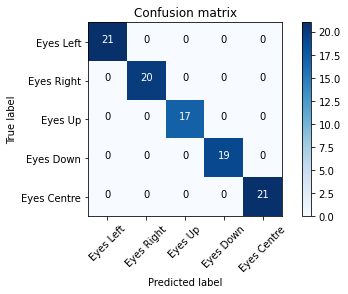

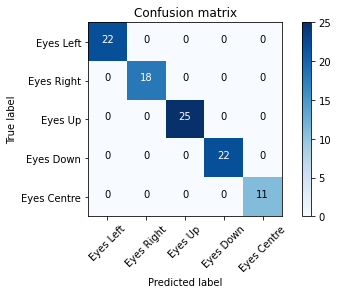

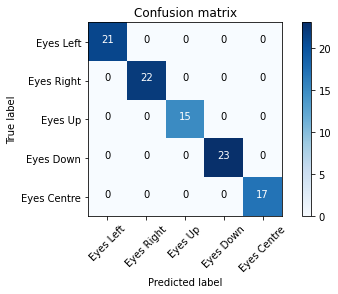

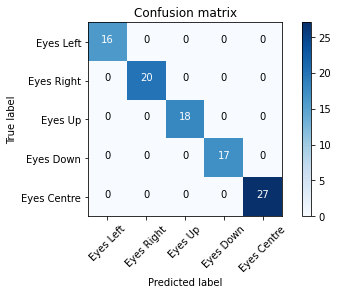

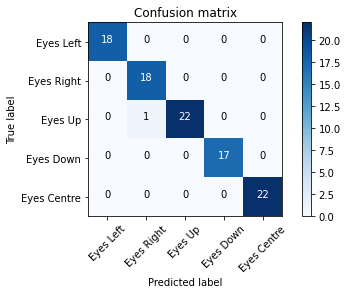

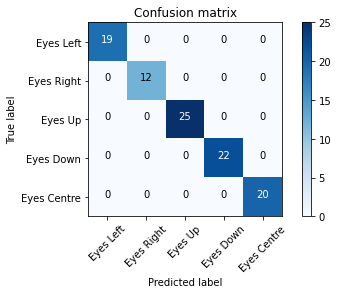

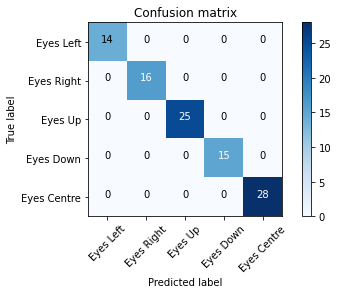

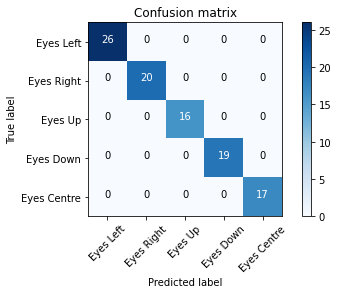

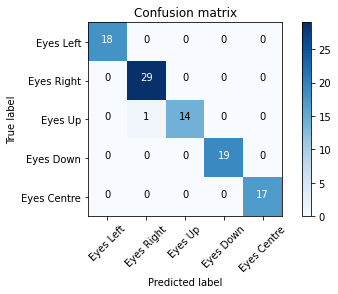

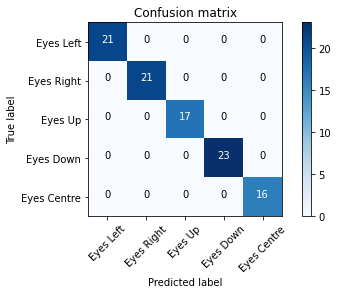

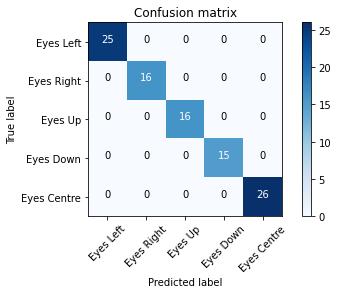

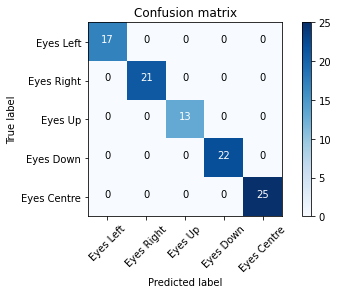

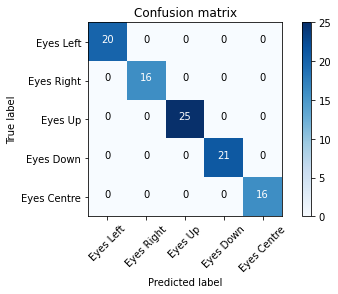

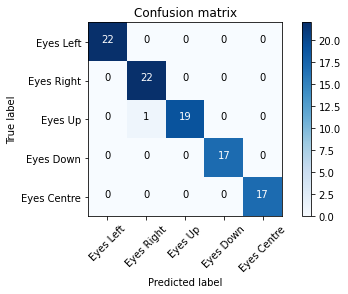

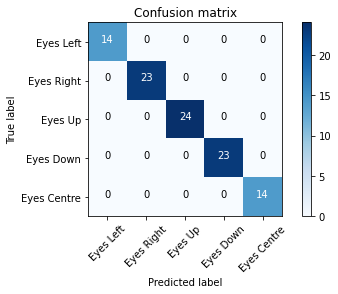

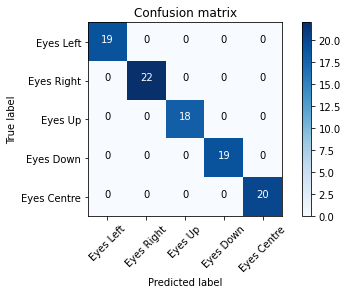

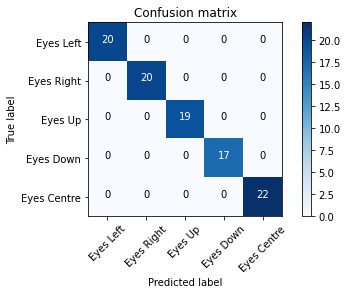

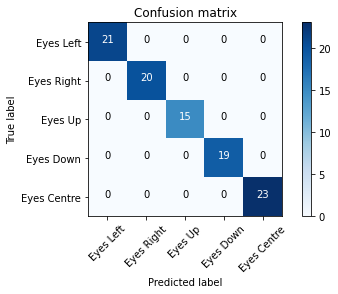

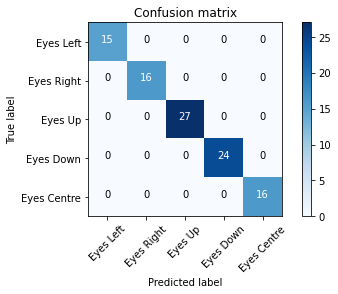

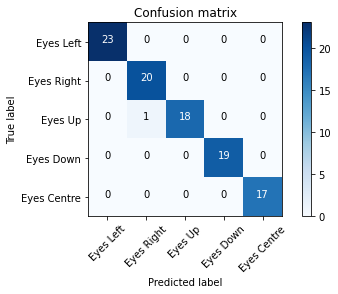

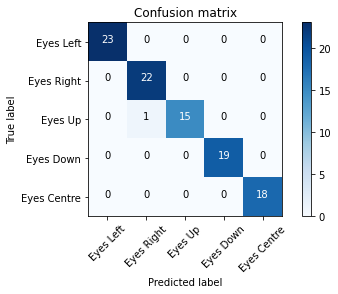

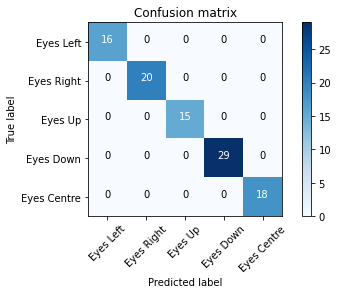

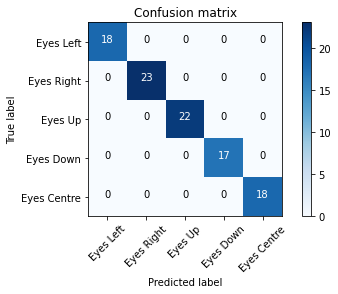

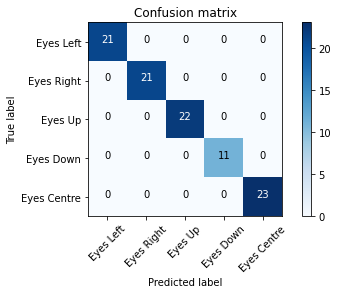

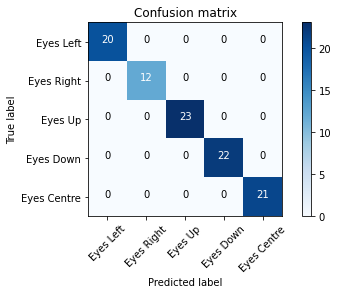

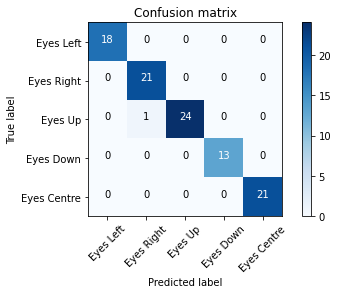

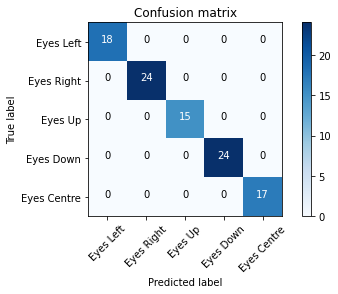

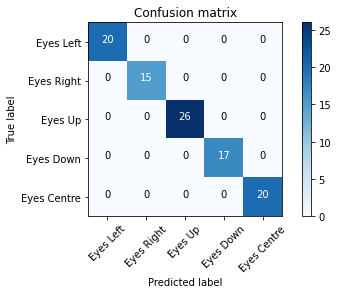

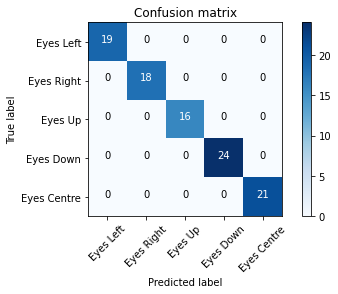

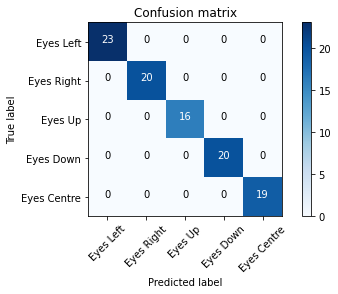

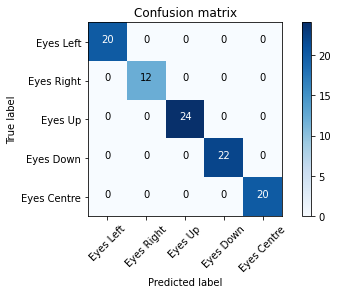

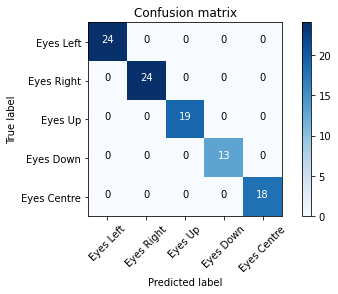

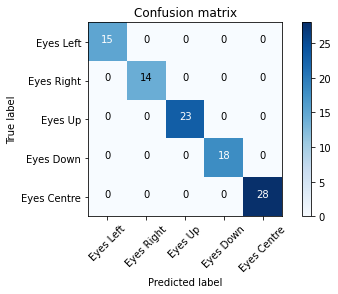

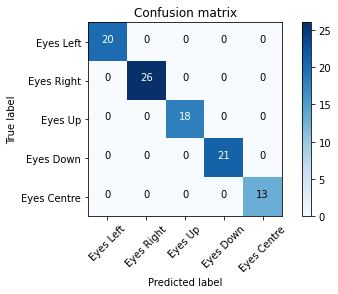

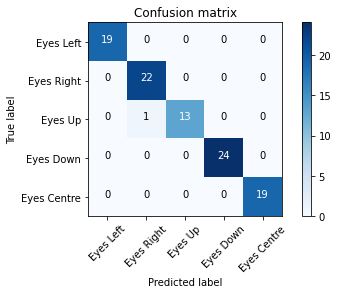

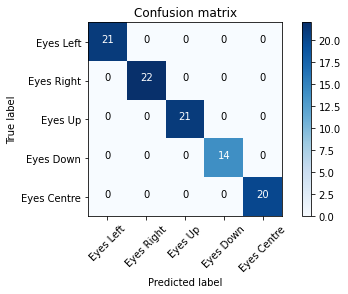

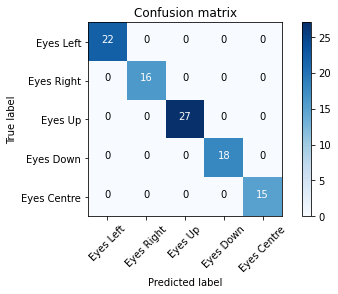

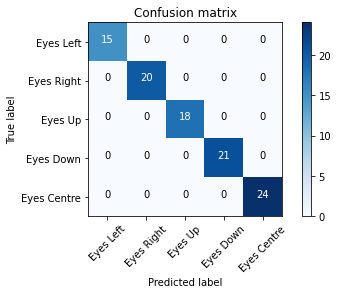

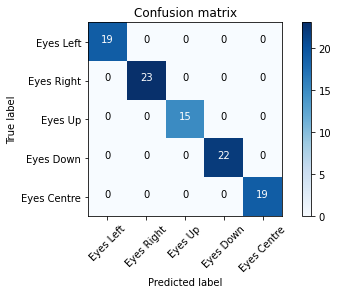

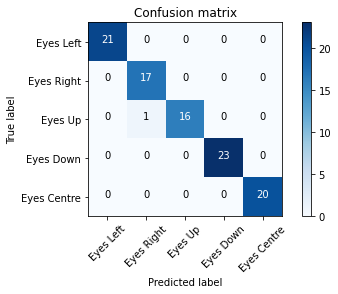

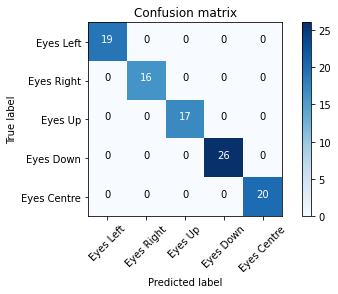

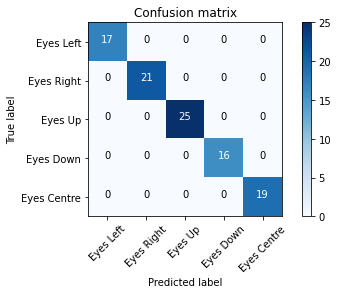

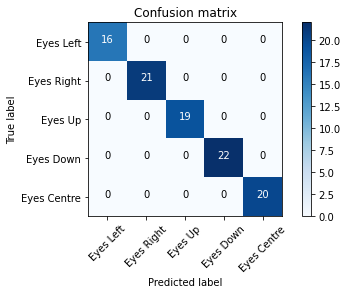

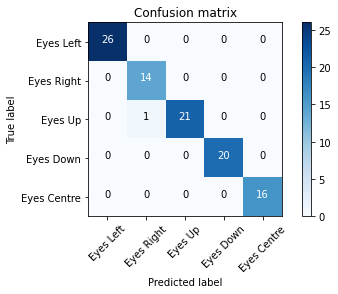

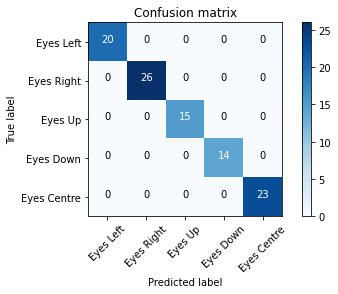

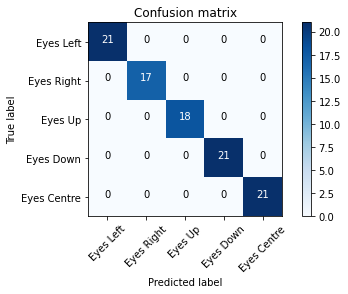

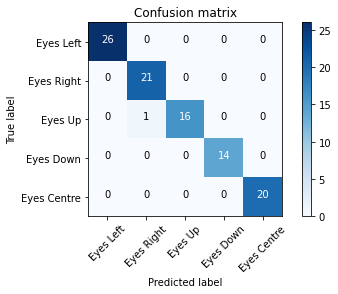

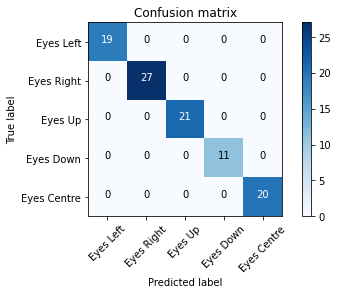

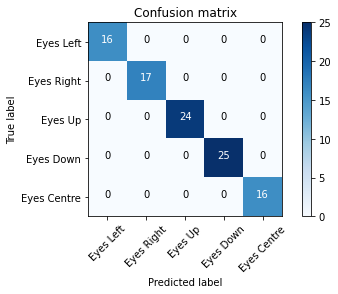

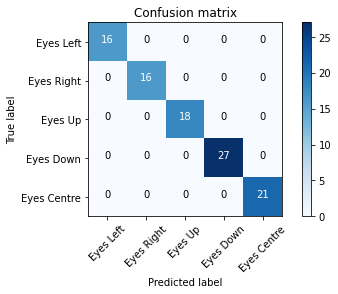

In [16]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in gb.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3,4])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Eyes Left','Eyes Right', 'Eyes Up', 'Eyes Down', 'Eyes Centre'],normalize= False,  title='Confusion matrix')


## LR Model

lr 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        18

   micro avg       1.00      1.00      1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Confusion matrix, without normalization
[[20  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 21  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 18]]
lr 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        25

   micro avg       1.00      1.00      1

lr 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        20

   micro avg       1.00      1.00      1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Confusion matrix, without normalization
[[15  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 17  0  0]
 [ 0  0  0 23  0]
 [ 0  0  0  0 20]]
lr 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        19

   micro avg       1.00      1.00      1

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


lr 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        19

   micro avg       1.00      1.00      1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Confusion matrix, without normalization
[[21  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 21  0  0]
 [ 0  0  0 17  0]
 [ 0  0  0  0 19]]
lr 0.9897959183673469
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      0.95      0.98        22
           3       0.96      1.00      0.98        23
           4       1.00      1.00      1.00        21

   micro avg       0.99  

lr 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        16

   micro avg       1.00      1.00      1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Confusion matrix, without normalization
[[18  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 24  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 16]]
lr 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20

   micro avg       1.00      1.00      1

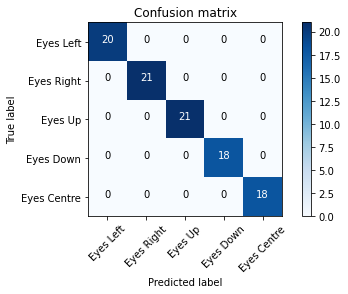

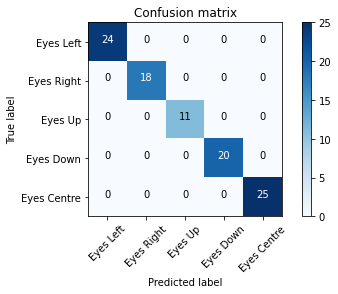

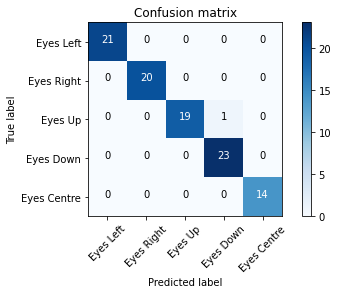

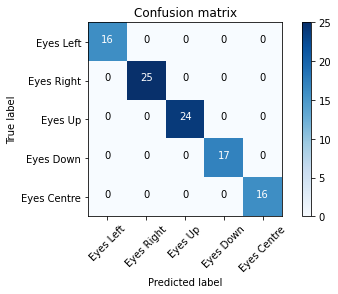

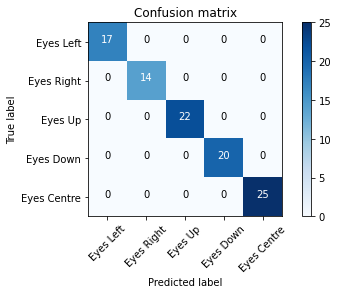

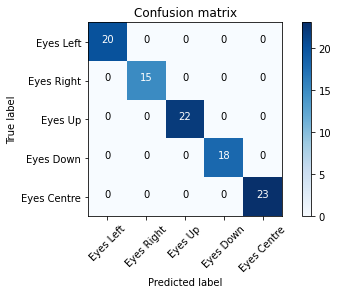

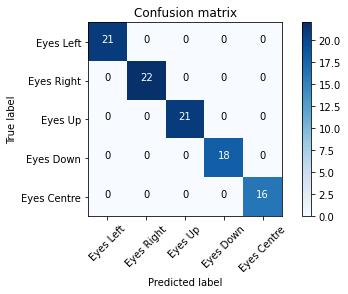

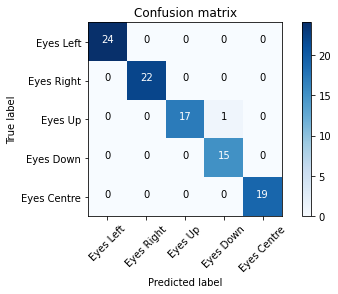

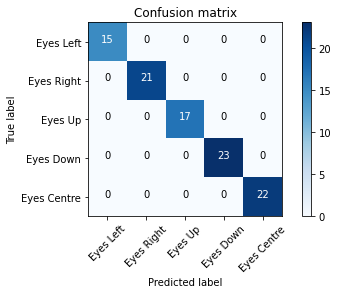

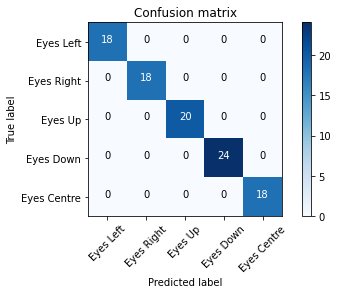

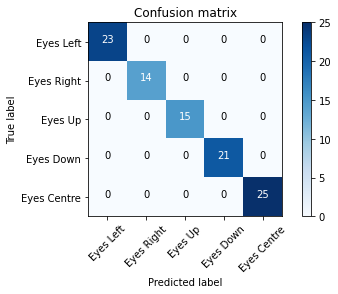

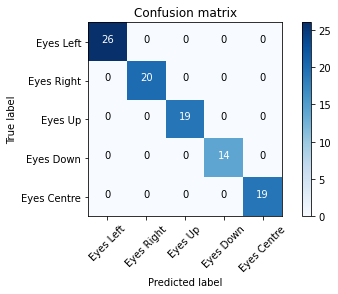

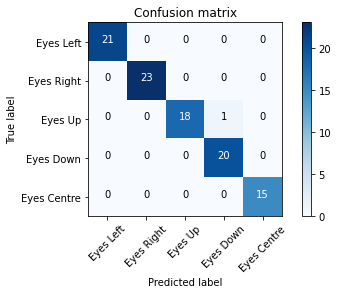

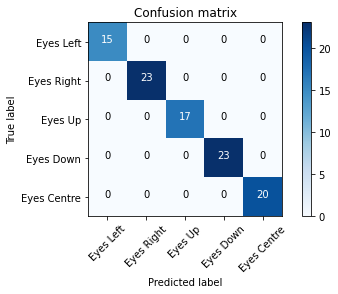

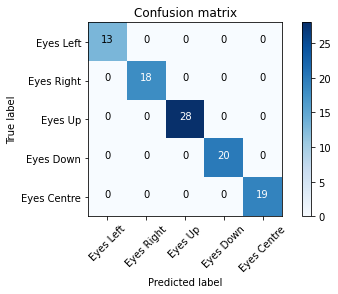

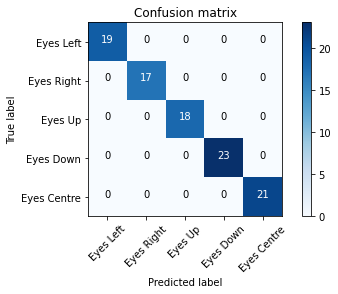

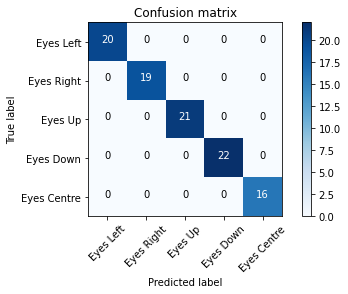

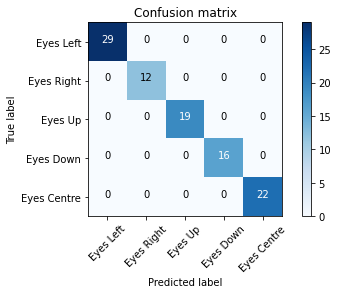

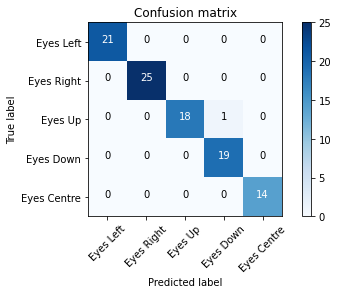

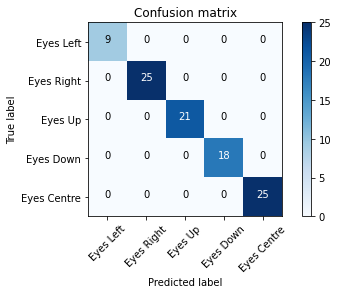

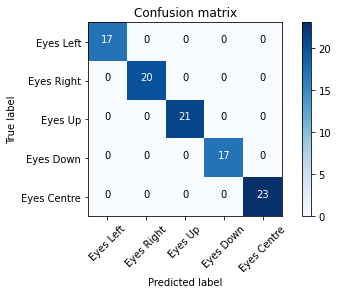

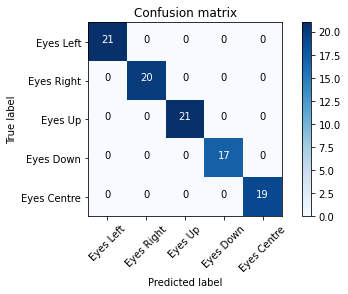

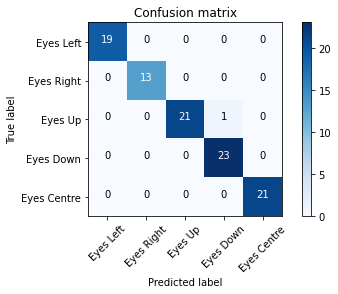

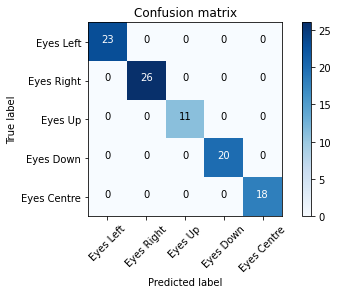

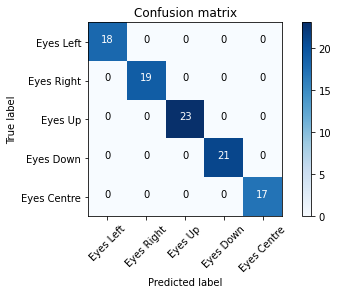

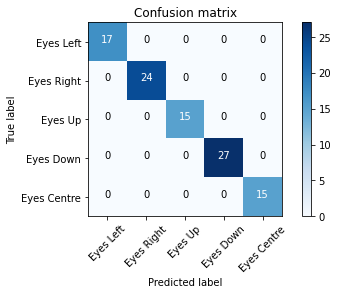

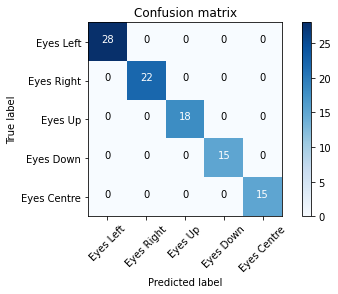

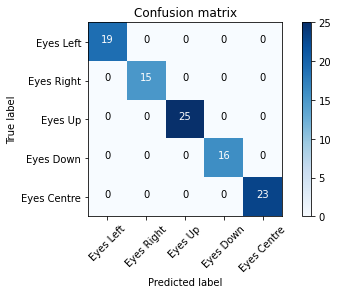

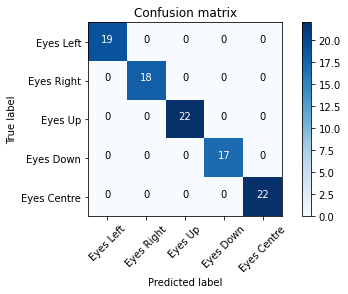

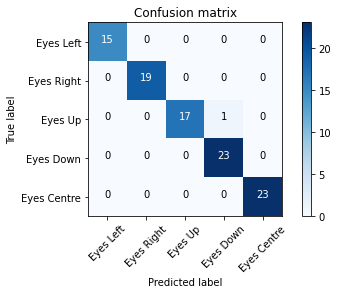

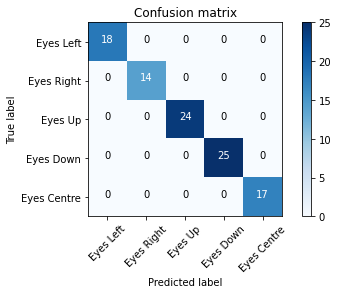

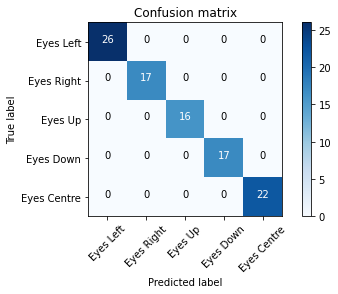

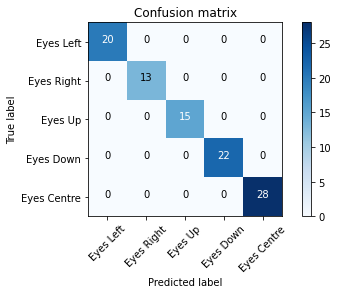

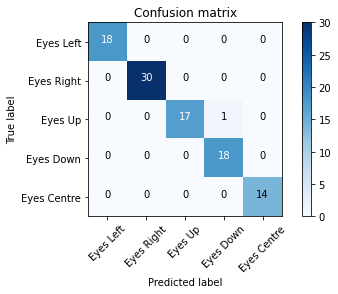

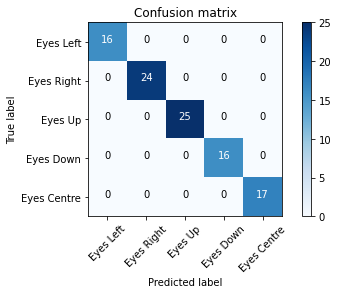

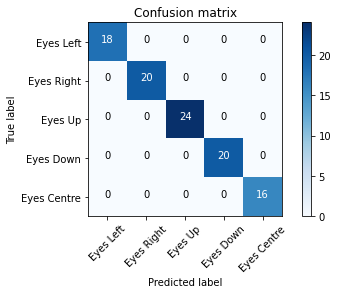

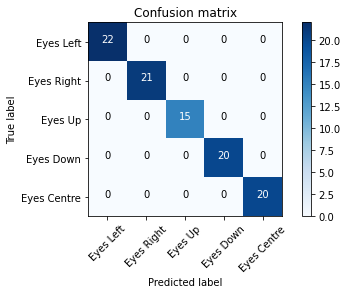

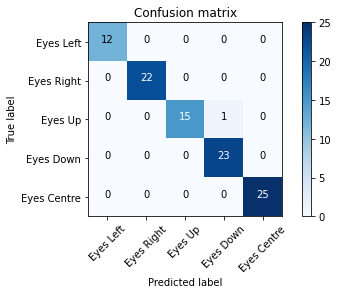

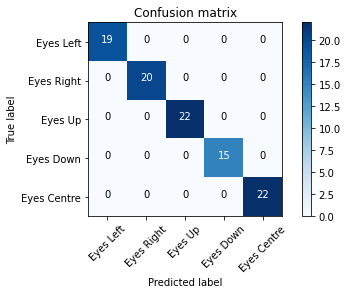

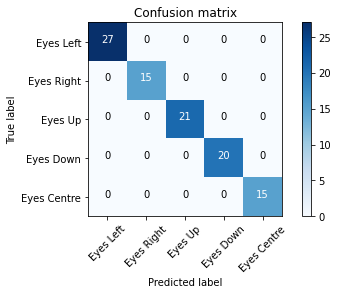

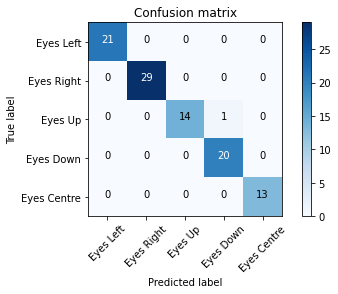

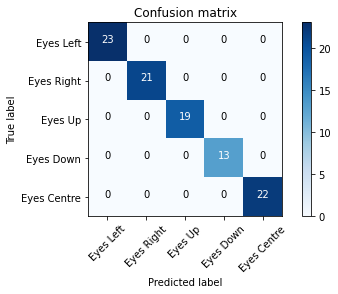

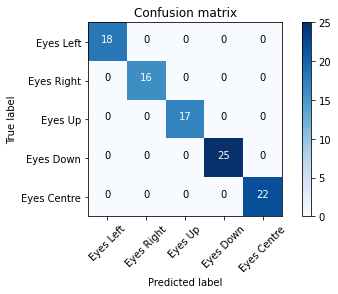

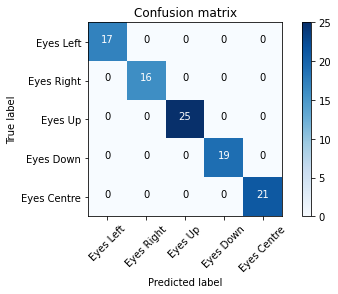

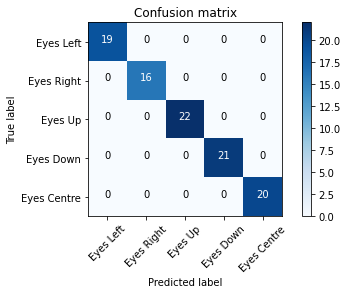

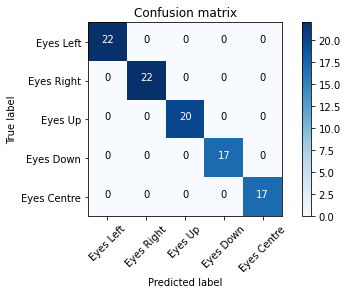

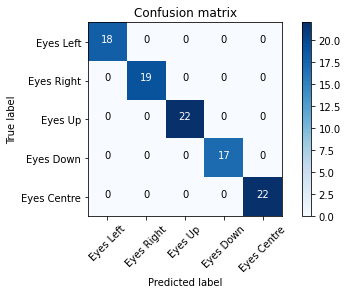

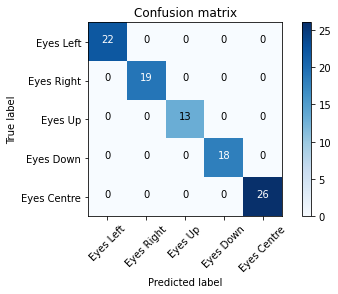

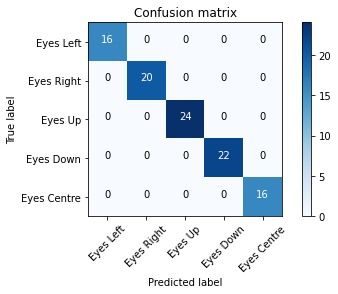

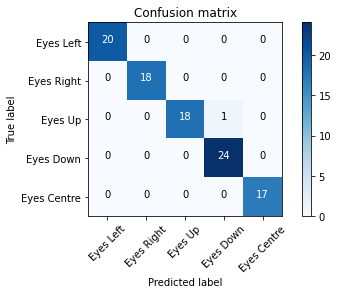

In [18]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in lr.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3,4])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Eyes Left','Eyes Right', 'Eyes Up', 'Eyes Down', 'Eyes Centre'],normalize= False,  title='Confusion matrix')


## RF Model

rf 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        18

   micro avg       1.00      1.00      1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Confusion matrix, without normalization
[[ 0  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 15  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 26]]
rf 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        18

   micro avg       1.00      1.00      1

rf 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        19

   micro avg       1.00      1.00      1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Confusion matrix, without normalization
[[ 0  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 24  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 16]]
rf 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        20

   micro avg       1.00      1.00      1

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


rf 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        21

   micro avg       1.00      1.00      1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Confusion matrix, without normalization
[[ 0  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 16]]
rf 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        23

   micro avg       1.00      1.00      1

rf 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        16

   micro avg       1.00      1.00      1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Confusion matrix, without normalization
[[ 0  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 19  0  0]
 [ 0  0  0 23  0]
 [ 0  0  0  0 24]]
rf 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        14

   micro avg       1.00      1.00      1

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        18

   micro avg       1.00      1.00      1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Confusion matrix, without normalization
[[ 0  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0 24  0]
 [ 0  0  0  0 23]]


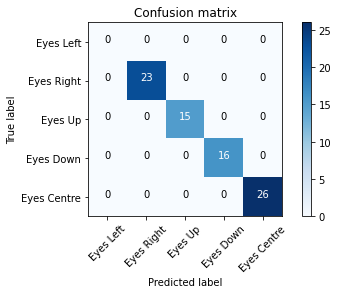

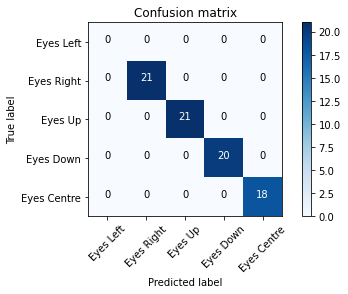

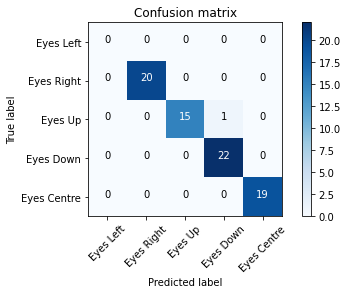

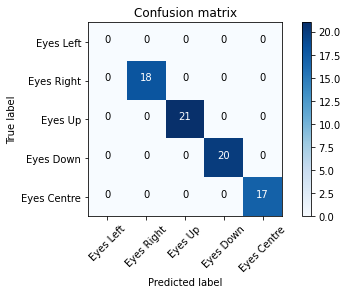

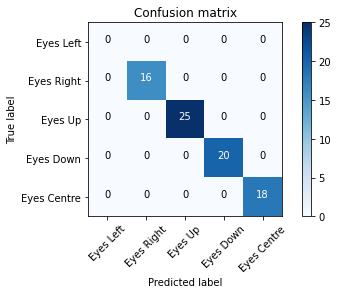

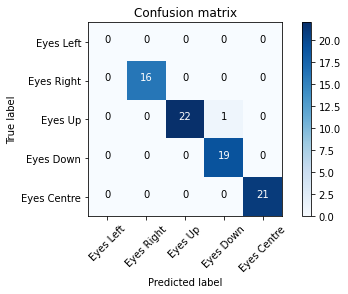

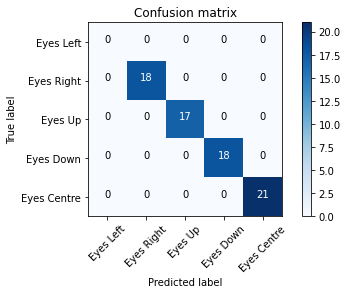

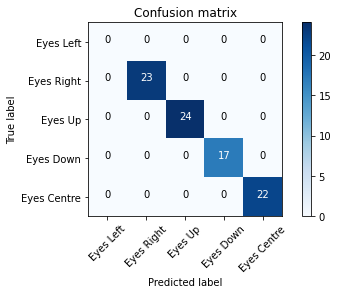

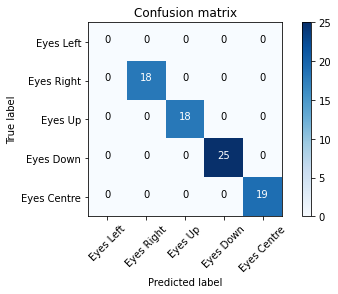

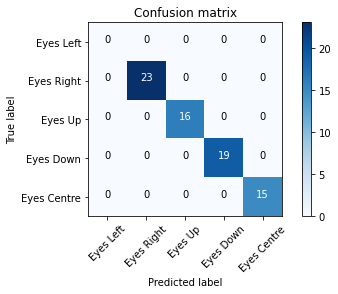

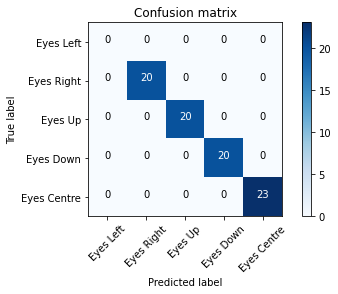

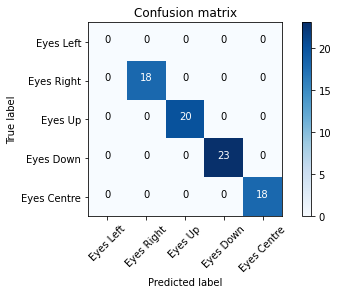

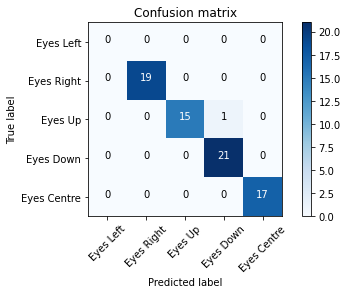

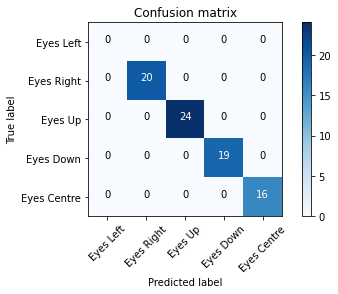

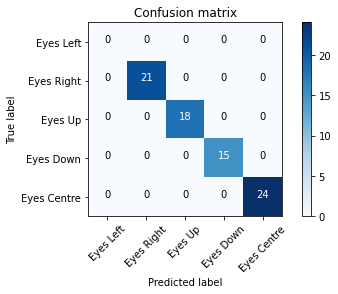

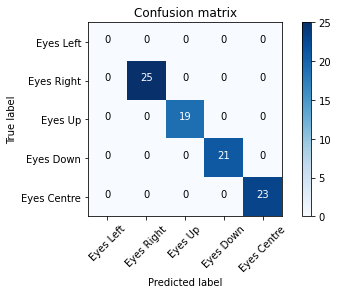

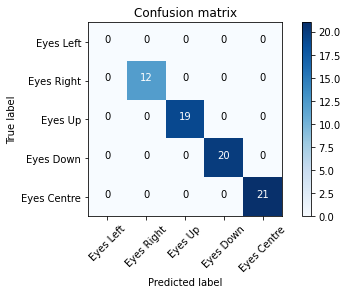

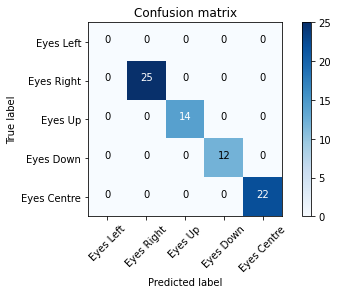

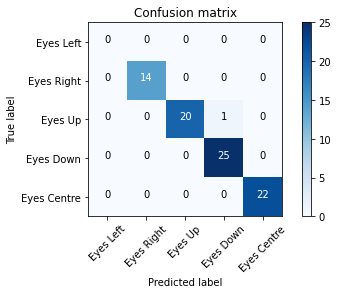

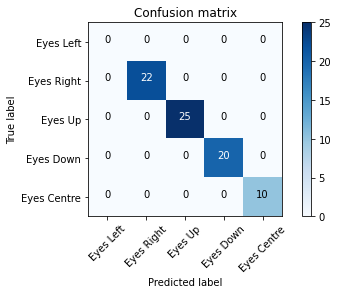

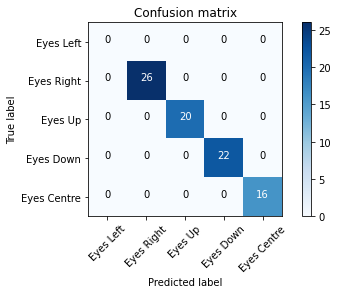

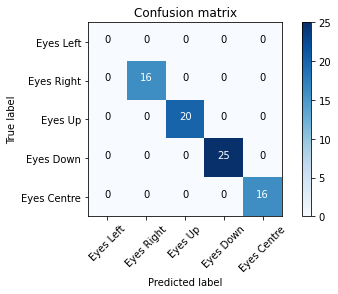

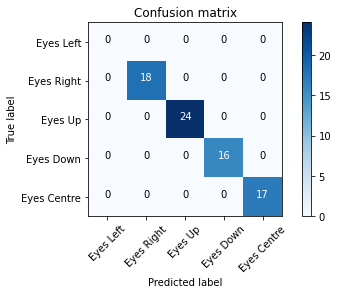

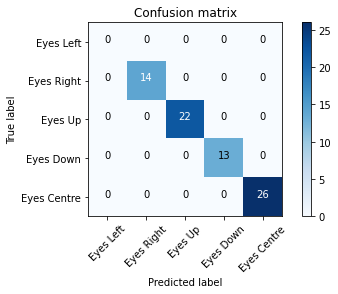

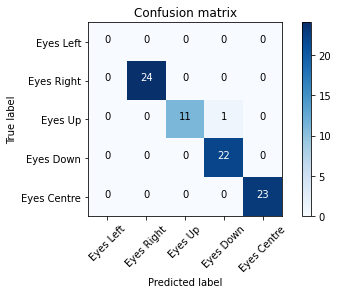

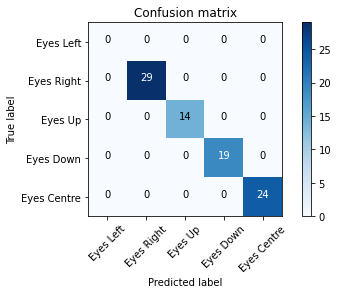

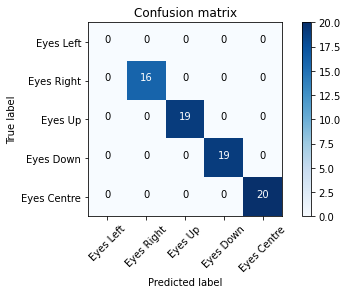

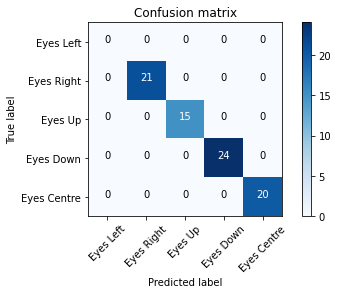

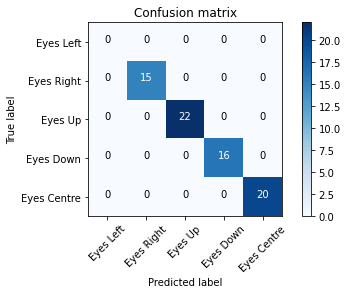

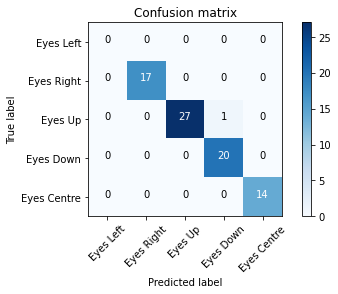

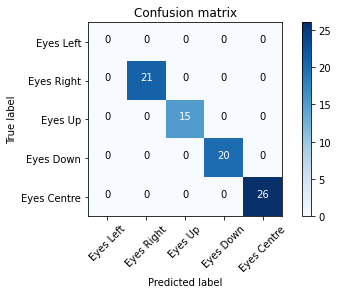

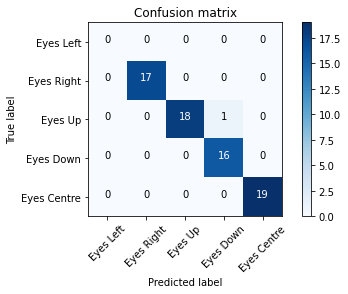

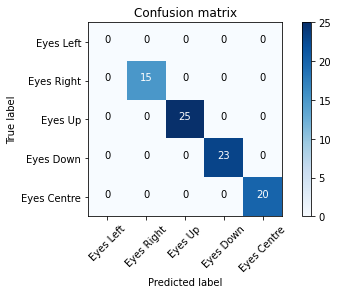

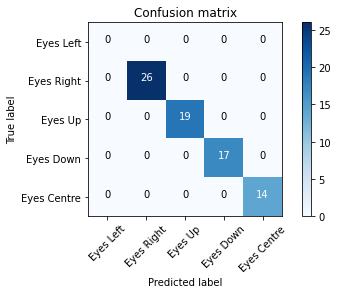

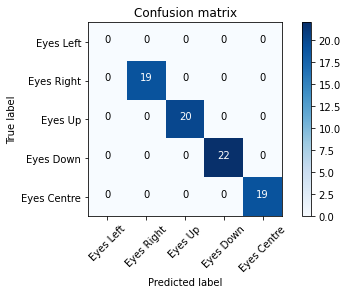

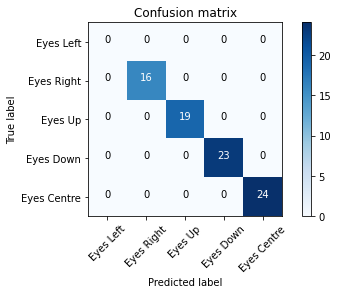

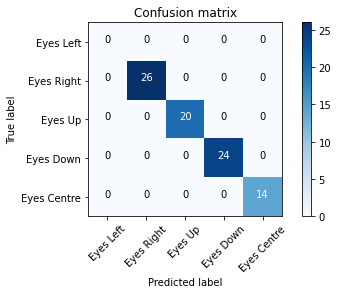

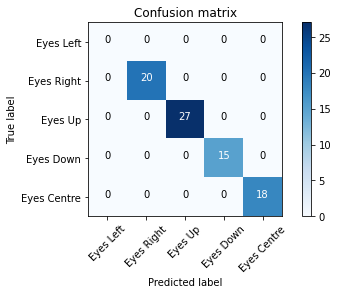

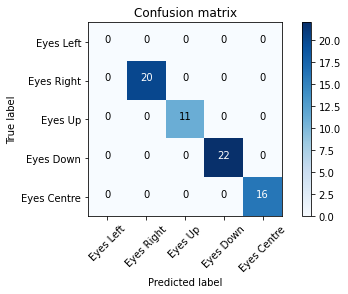

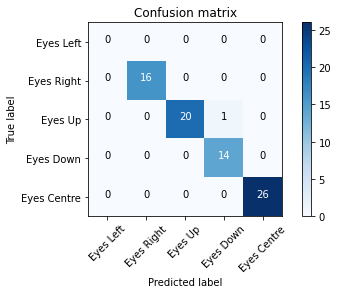

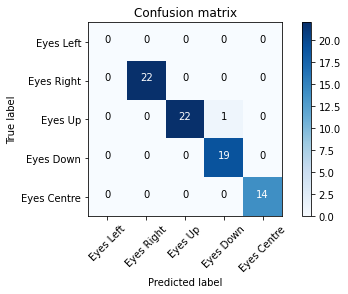

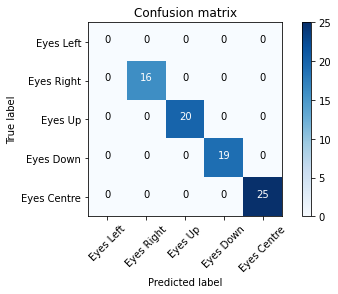

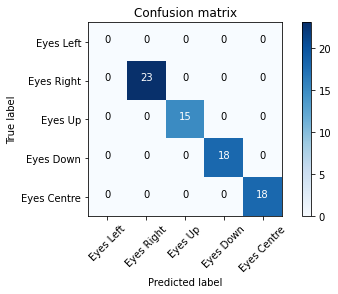

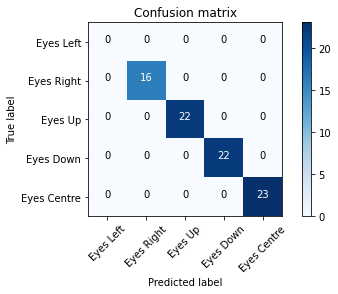

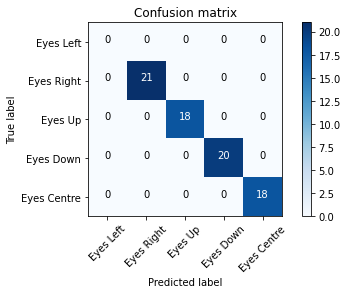

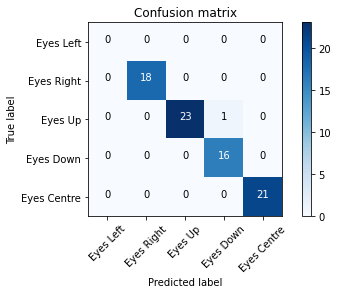

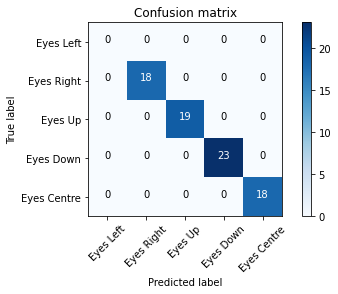

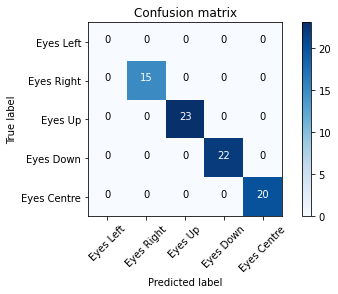

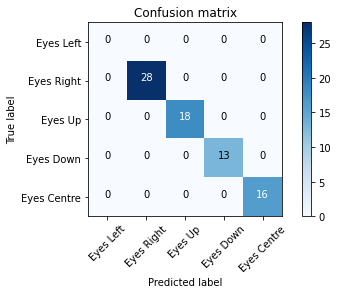

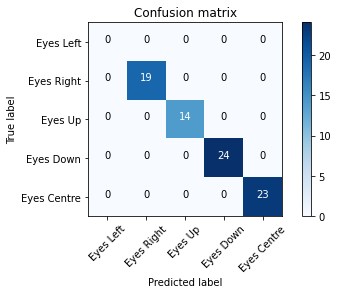

In [18]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in rf.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3,4])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Eyes Left','Eyes Right', 'Eyes Up', 'Eyes Down', 'Eyes Centre'],normalize= False,  title='Confusion matrix')


## RC Model

rc 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        10

   micro avg       1.00      1.00      1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Confusion matrix, without normalization
[[22  0  0  0  0]
 [ 0 26  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 10]]
rc 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        23

   micro avg       1.00      1.00      1

rc 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        19

   micro avg       1.00      1.00      1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Confusion matrix, without normalization
[[23  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0 17  0]
 [ 0  0  0  0 19]]
rc 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        20

   micro avg       1.00      1.00      1

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


rc 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        20

   micro avg       1.00      1.00      1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Confusion matrix, without normalization
[[18  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 15  0  0]
 [ 0  0  0 22  0]
 [ 0  0  0  0 20]]
rc 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        15

   micro avg       1.00      1.00      1

rc 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        21

   micro avg       1.00      1.00      1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Confusion matrix, without normalization
[[16  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 21]]
rc 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        16

   micro avg       1.00      1.00      1

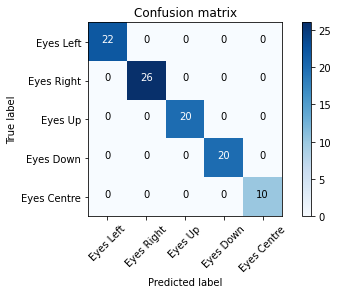

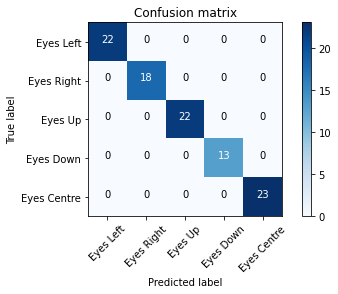

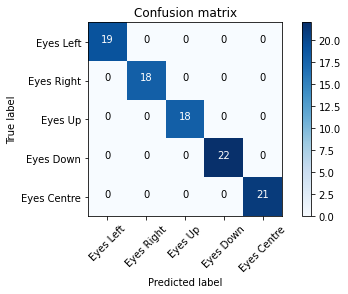

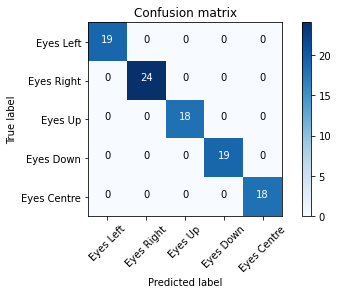

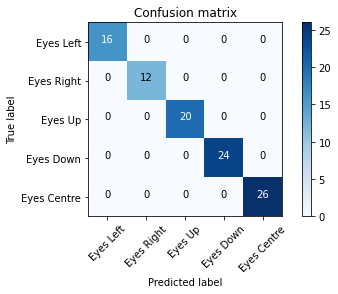

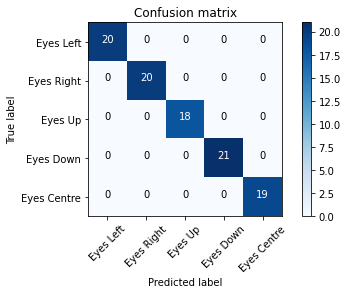

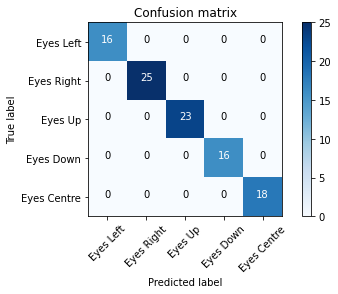

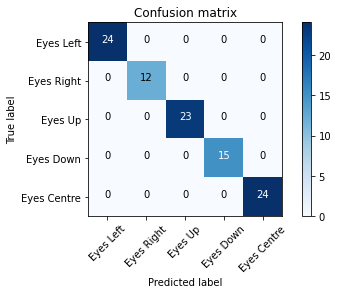

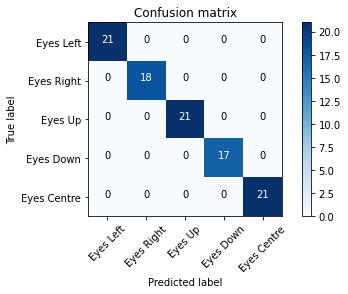

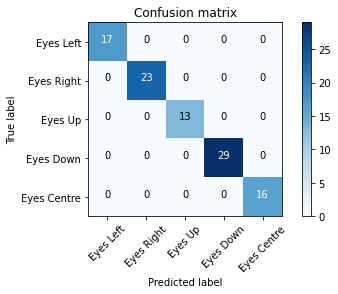

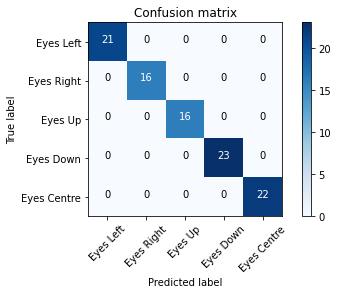

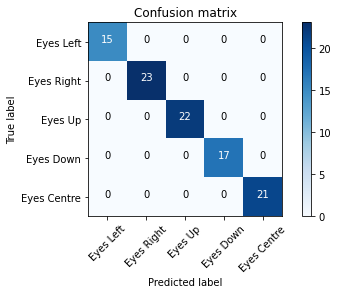

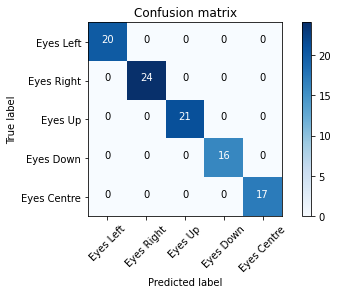

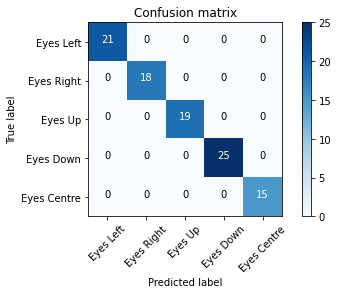

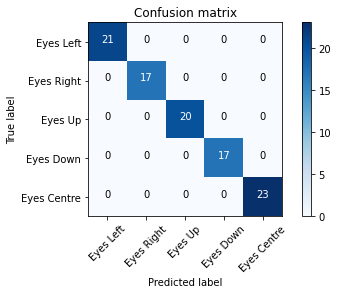

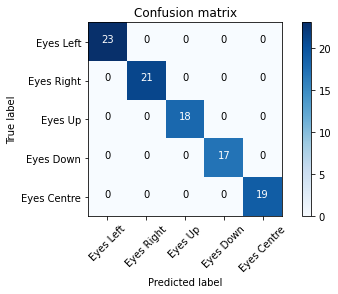

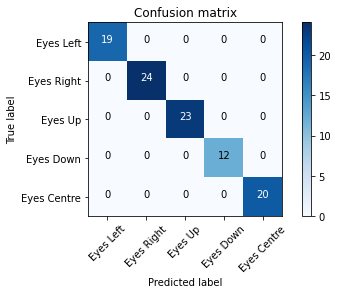

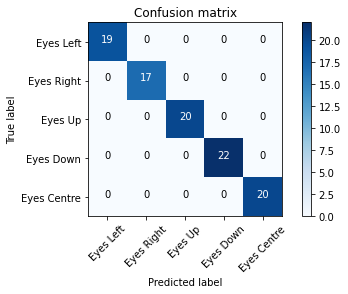

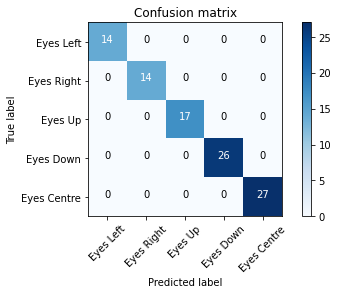

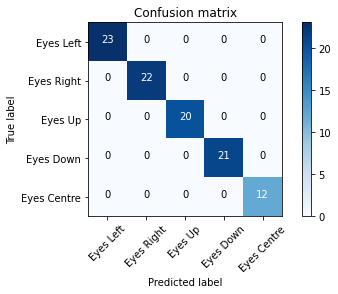

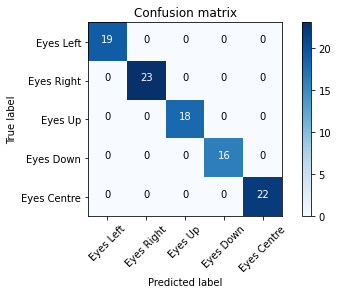

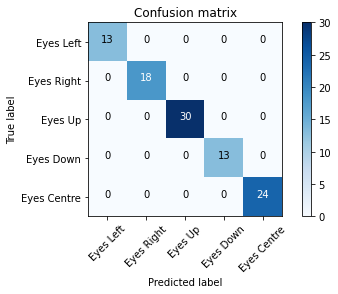

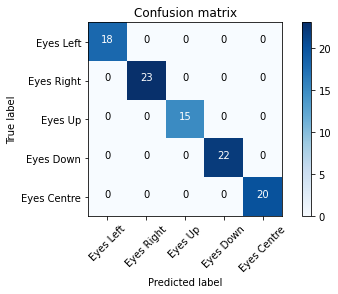

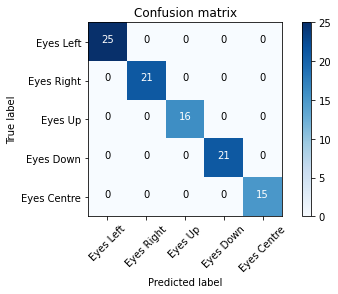

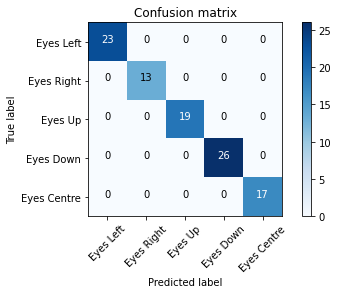

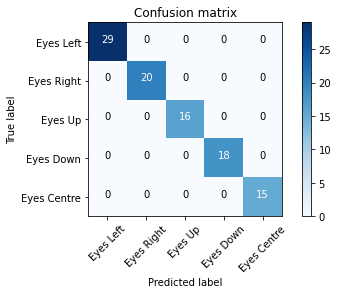

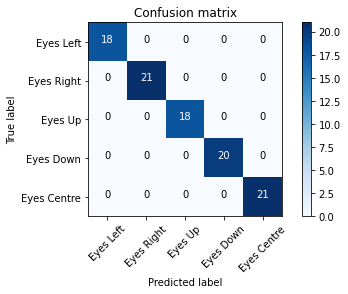

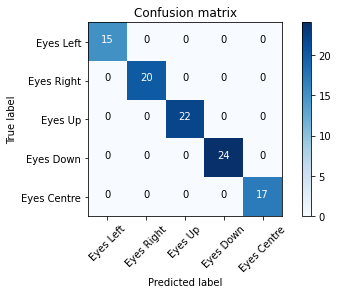

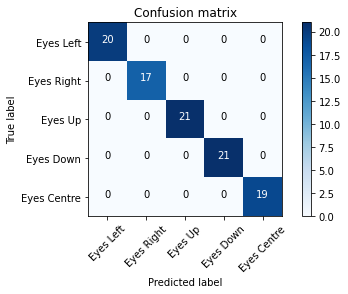

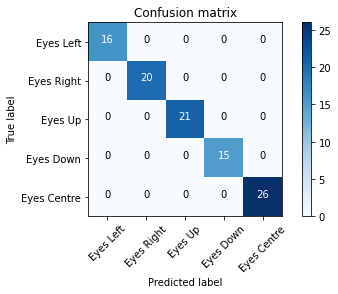

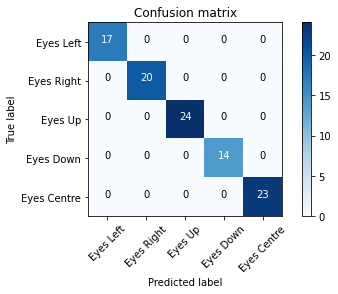

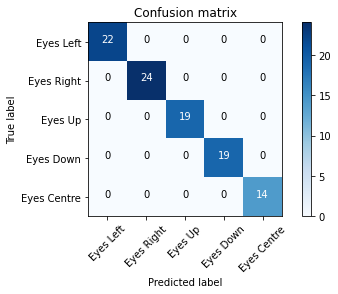

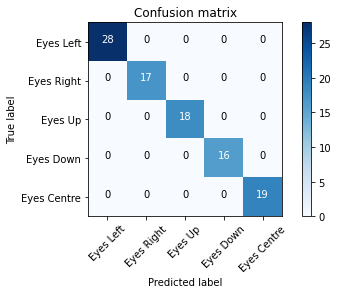

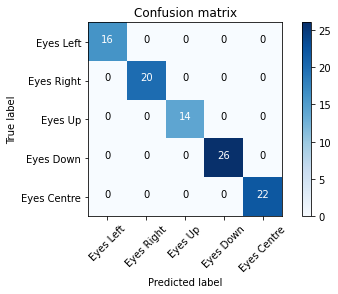

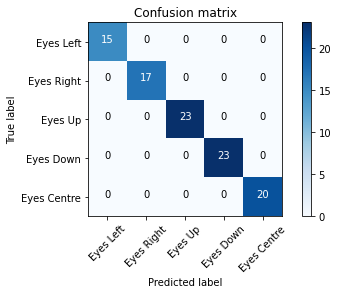

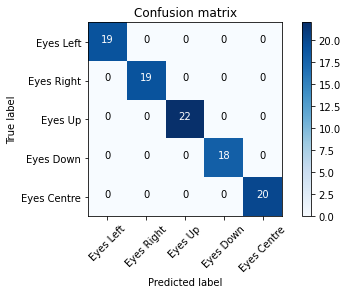

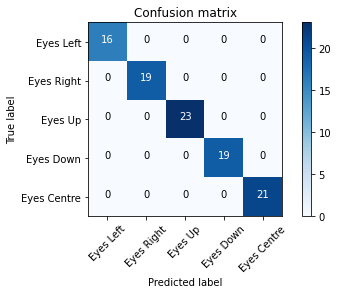

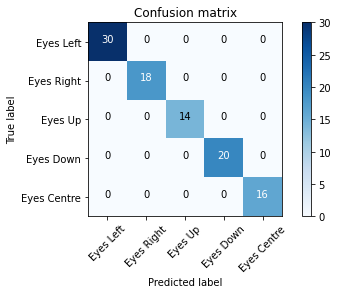

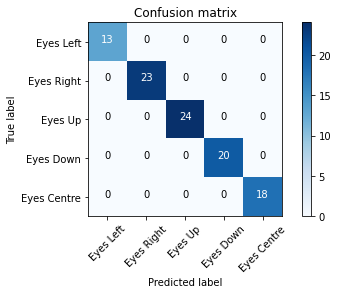

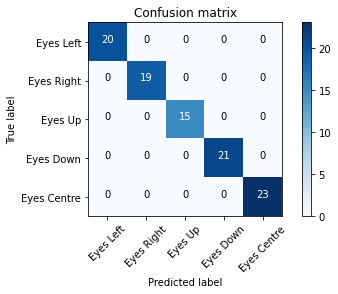

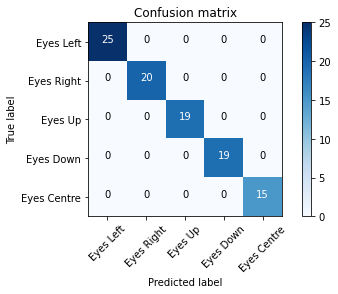

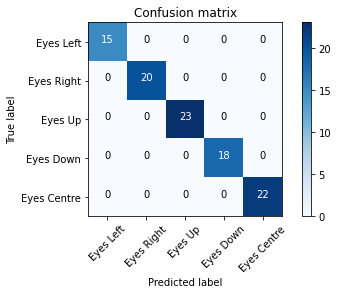

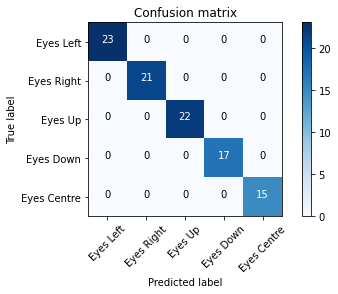

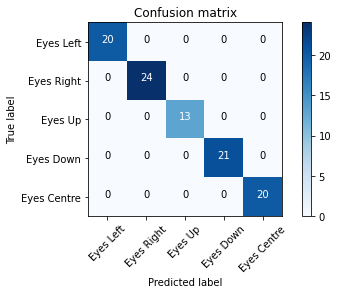

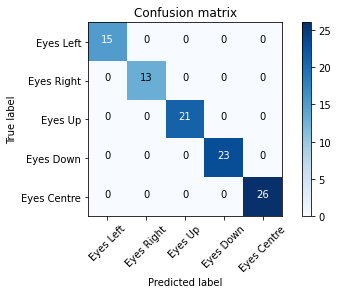

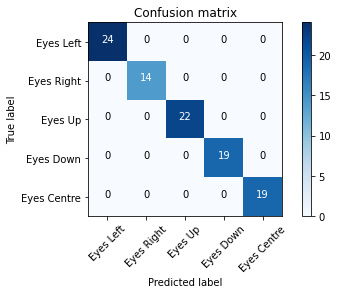

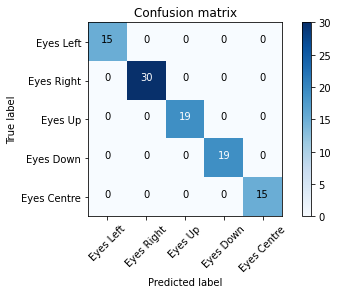

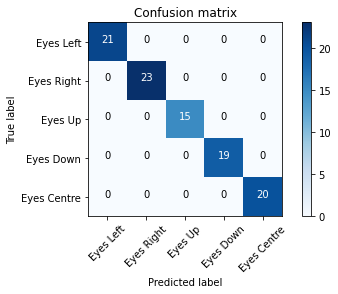

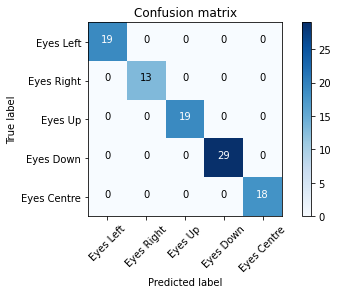

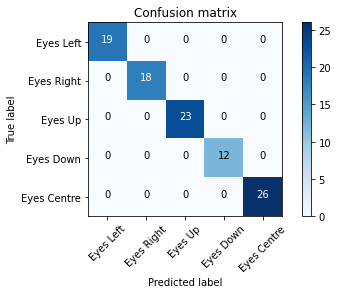

In [19]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in rc.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3,4])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Eyes Left','Eyes Right', 'Eyes Up', 'Eyes Down', 'Eyes Centre'],normalize= False,  title='Confusion matrix')


In [20]:
import pickle
with open('iris_states_0.pkl', 'wb') as f:
    pickle.dump(fit_models['gb'], f)